<a href="https://colab.research.google.com/github/utkuden/DI725_assignment/blob/main/Assignment_1_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git Setup

In [ ]:
token = "..."

!git config --global user.email "..."
!git config --global user.name "utkuden"

!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=u.deniz.dincturk@gmail.com
user.name=utkuden


In [ ]:
!git clone https://{token}@github.com/"utkuden"/"DI725_assignment"

Cloning into 'DI725_assignment'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 292 (delta 111), reused 278 (delta 108), pack-reused 0 (from 0)
Receiving objects: 100% (292/292), 5.63 MiB | 20.87 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [ ]:
cd DI725_assignment/assignment_1/

/content/DI725_assignment/assignment_1


In [ ]:
!git status

In [ ]:
!git add .
!git commit -m "clean up"

In [ ]:
!git push -u origin main

Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (1/1), done.
Writing objects: 100% (2/2), 232 bytes | 232.00 KiB/s, done.
Total 2 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/utkuden/DI725_assignment
   2408828..be2fc38  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


# Requirements

In [ ]:
!pip install torch numpy transformers datasets tiktoken wandb tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

# WANDB Setup

In [ ]:
!pip install wandb -qU

In [ ]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: utkuden (utkuden-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# EDA

## Basic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
# import warnings
# warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(style='whitegrid')

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [ ]:
train_df = pd.read_csv('data/customer_service/train.csv')
test_df = pd.read_csv('data/customer_service/test.csv')

print(f"Training dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Training dataset shape: (970, 11)
Test dataset shape: (30, 11)


In [ ]:
print(train['conversation'].iloc[0])

Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me check that for you. I'm sorry to inform you that we don't have this number on our records. Can you please confirm if this is the correct number?

Customer: Oh, I'm sorry. I might have registered with a different number. Can you please check with my email address instead? It's johndoe@email.com.

Agent: Sure, let me check that for you. (After a few moments) I see that we have your email address on our records. We'll be sending you a verification code shortly. Please check your email and let me know

In [ ]:
train_df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,...,conversation_length,customer_mentions,agent_mentions,customer_text,agent_text,customer_text_length,agent_text_length,processed_customer_text,processed_agent_text,processed_full_text
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",...,1487,6,7,"Hi Tom, I'm trying to log in to my account to ...",Thank you for calling BrownBox Customer Suppor...,530,835,hi tom trying log account purchase oven toaste...,thank calling brownbox customer support name t...,agent thank calling brownbox customer support ...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",...,1546,6,7,Hi Alex. I recently received an email from Bro...,Thank you for calling BrownBox customer suppor...,439,985,hi alex recently received email brownbox reque...,thank calling brownbox customer support name a...,agent thank calling brownbox customer support ...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",...,2417,9,11,"Hi Sarah, I am calling because I am unable to ...",Thank you for calling BrownBox Customer Suppor...,535,1695,hi sarah calling unable click cancel button ju...,thank calling brownbox customer support name s...,agent thank calling brownbox customer support ...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...",...,2096,9,8,"Hi, I am facing an issue while logging into my...","Hi there, I'm sorry to hear that you are facin...",653,1280,hi facing issue logging account getting error ...,hi sorry hear facing issue logging account hap...,customer hi facing issue logging account getti...
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",...,3034,8,5,"Hi Sarah, I have an issue with my order. I rec...",Thank you for contacting BrownBox customer sup...,1821,1085,hi sarah issue order received bp monitor deliv...,thank contacting brownbox customer support nam...,agent thank contacting brownbox customer suppo...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB


In [ ]:
print(train_df.isnull().sum())

issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64


In [ ]:
import os
os.makedirs('figures', exist_ok=True)

customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Percentage distribution of sentiment classes:
customer_sentiment
neutral     55.876289
negative    42.371134
positive     1.752577
Name: proportion, dtype: float64


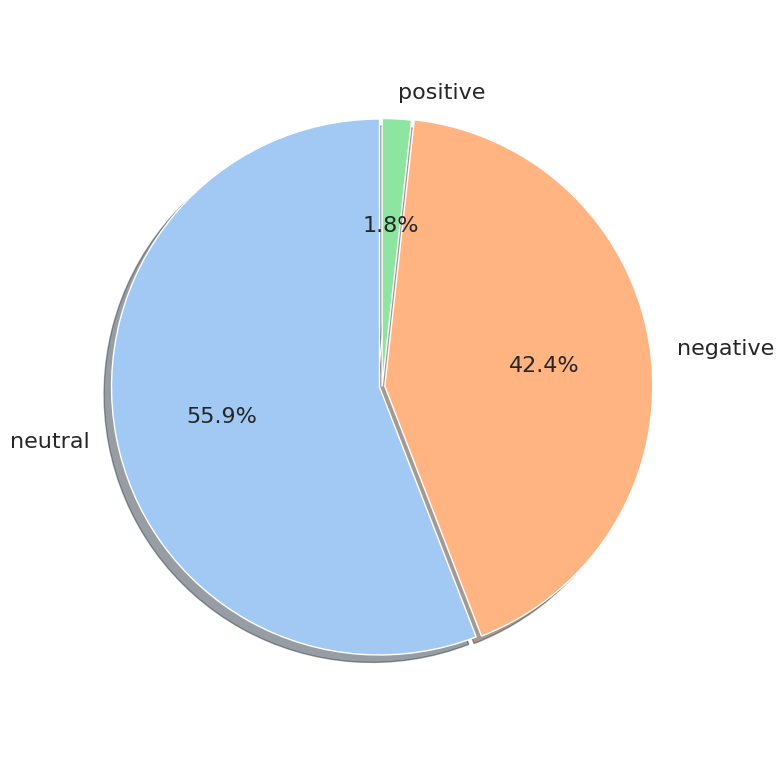

In [ ]:
sentiment_counts = train_df['customer_sentiment'].value_counts()
print(sentiment_counts)

sentiment_percentage = train_df['customer_sentiment'].value_counts(normalize=True) * 100
print("\nPercentage distribution of sentiment classes:")
print(sentiment_percentage)

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'), explode=(0.01, 0.01, 0), shadow=True, textprops={'fontsize': 16})
plt.axis('equal')
# plt.title('Percentage Distribution of Customer Sentiment')
plt.tight_layout()
plt.savefig('figures/sentiment_pie_chart.png', dpi=300)
plt.show()

In [ ]:
train.groupby('product_category')['customer_sentiment'].value_counts(normalize=True).unstack()

customer_sentiment,negative,neutral,positive
product_category,,,
Appliances,0.418502,0.561674,0.019824
Electronics,0.416382,0.580205,0.003413
Men/Women/Kids,0.443946,0.524664,0.031390


In [ ]:
train.groupby('product_sub_category')['customer_sentiment'].value_counts(normalize=True).unstack().sort_values('negative', ascending=False)

customer_sentiment,negative,neutral,positive
product_sub_category,,,
Baby Food,0.666667,0.333333,NaN
Backpack,0.642857,0.357143,NaN
Ceiling Fan,0.571429,0.428571,NaN
Vacuum Cleaner,0.560000,0.440000,NaN
Juicer/Mixer/Grinder,0.550000,0.400000,0.050000
Smart Watch,0.550000,0.450000,NaN
Water Purifier,0.538462,0.461538,NaN
Smart Band,0.538462,0.461538,NaN
Toy,0.526316,0.421053,0.052632


In [ ]:
train['conv_len'] = train['conversation'].apply(lambda x: len(x.split()))
train.groupby('customer_sentiment')[['conv_len']].agg({'conv_len': [np.mean, len]})

<ipython-input-60-56f51a890445>:2: FutureWarning: The provided callable <function mean at 0x7e048d7b93a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train.groupby('customer_sentiment')[['conv_len']].agg({'conv_len': [np.mean, len]})


conv_len     
                          mean  len
customer_sentiment                 
negative            417.666667  411
neutral             337.778598  542
positive            294.000000   17

## Relations

Issue Complexity vs Sentiment:
customer_sentiment  negative  neutral  positive
issue_complexity                               
high                      39       40         3
less                     197      268         7
medium                   175      234         7
Issue Complexity vs Sentiment (Percentages by Row):
customer_sentiment   negative    neutral  positive
issue_complexity                                  
high                47.560976  48.780488  3.658537
less                41.737288  56.779661  1.483051
medium              42.067308  56.250000  1.682692


<Figure size 1200x600 with 0 Axes>

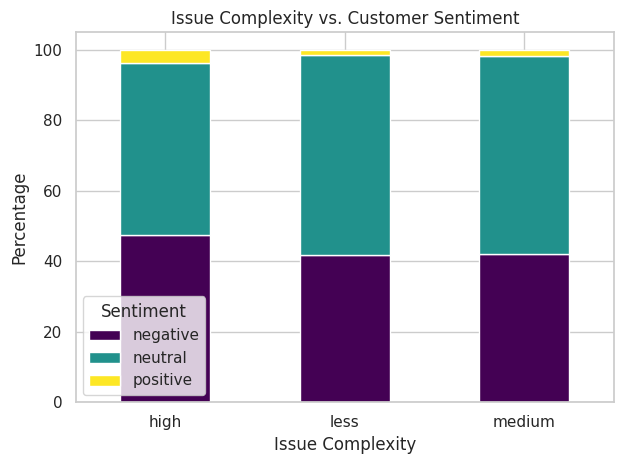

In [ ]:
print("Issue Complexity vs Sentiment:")
complexity_sentiment = pd.crosstab(train_df['issue_complexity'], train_df['customer_sentiment'])
print(complexity_sentiment)

complexity_sentiment_pct = pd.crosstab(train_df['issue_complexity'],
                                      train_df['customer_sentiment'],
                                      normalize='index') * 100
print("Issue Complexity vs Sentiment (Percentages by Row):")
print(complexity_sentiment_pct)

plt.figure(figsize=(12, 6))
complexity_sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Issue Complexity vs. Customer Sentiment')
plt.xlabel('Issue Complexity')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('figures/complexity_vs_sentiment.png', dpi=300)
plt.show()

Agent Experience Level vs Sentiment
customer_sentiment      negative  neutral  positive
agent_experience_level                             
experienced                  147      188         4
inexperienced                 47       93         1
junior                       217      261        12

Agent Experience Level vs Sentiment (Percentages by Row):
customer_sentiment       negative    neutral  positive
agent_experience_level                                
experienced             43.362832  55.457227  1.179941
inexperienced           33.333333  65.957447  0.709220
junior                  44.285714  53.265306  2.448980


<Figure size 1200x600 with 0 Axes>

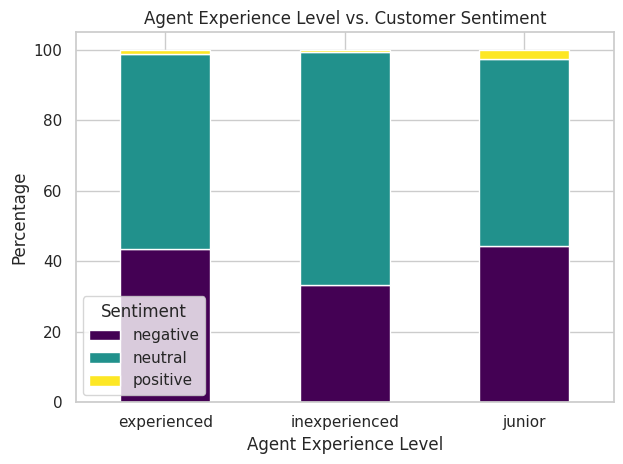

In [ ]:
print("Agent Experience Level vs Sentiment")
experience_sentiment = pd.crosstab(train_df['agent_experience_level'], train_df['customer_sentiment'])
print(experience_sentiment)

experience_sentiment_pct = pd.crosstab(train_df['agent_experience_level'],
                                       train_df['customer_sentiment'],
                                       normalize='index') * 100
print("\nAgent Experience Level vs Sentiment (Percentages by Row):")
print(experience_sentiment_pct)

plt.figure(figsize=(12, 6))
experience_sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Agent Experience Level vs. Customer Sentiment')
plt.xlabel('Agent Experience Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('figures/experience_vs_sentiment.png', dpi=300)
plt.show()

Issue Area vs Sentiment:
customer_sentiment         negative  neutral  positive
issue_area                                            
Cancellations and returns       136      141         0
Login and Account                28      121         0
Order                           156       85        17
Shipping                         37       33         0
Shopping                         36       77         0
Warranty                         18       85         0

Issue Area vs Sentiment (Percentages by Row):
customer_sentiment          negative    neutral  positive
issue_area                                               
Cancellations and returns  49.097473  50.902527  0.000000
Login and Account          18.791946  81.208054  0.000000
Order                      60.465116  32.945736  6.589147
Shipping                   52.857143  47.142857  0.000000
Shopping                   31.858407  68.141593  0.000000
Warranty                   17.475728  82.524272  0.000000


<Figure size 1400x700 with 0 Axes>

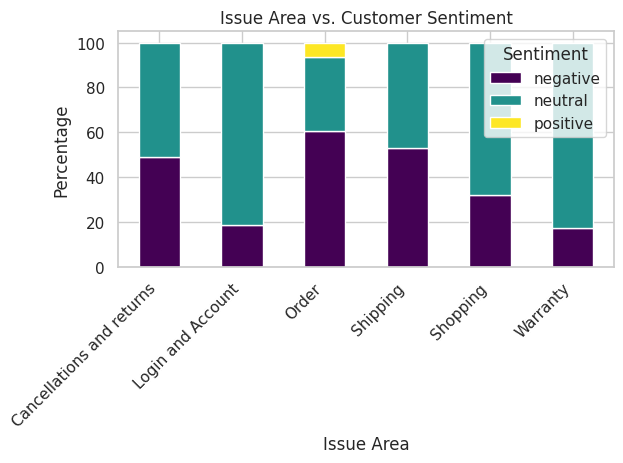

In [ ]:
print("Issue Area vs Sentiment:")
area_sentiment = pd.crosstab(train_df['issue_area'], train_df['customer_sentiment'])
print(area_sentiment)

area_sentiment_pct = pd.crosstab(train_df['issue_area'],
                                train_df['customer_sentiment'],
                                normalize='index') * 100
print("\nIssue Area vs Sentiment (Percentages by Row):")
print(area_sentiment_pct)

plt.figure(figsize=(14, 7))
area_sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Issue Area vs. Customer Sentiment')
plt.xlabel('Issue Area')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('figures/area_vs_sentiment.png', dpi=300)
plt.show()

Conversation Length Statistics by Sentiment:
                     min   max         mean  median
customer_sentiment                                 
negative              46  5708  2395.454988  2321.0
neutral              745  4801  1940.826568  1888.5
positive            1173  2190  1702.705882  1670.0


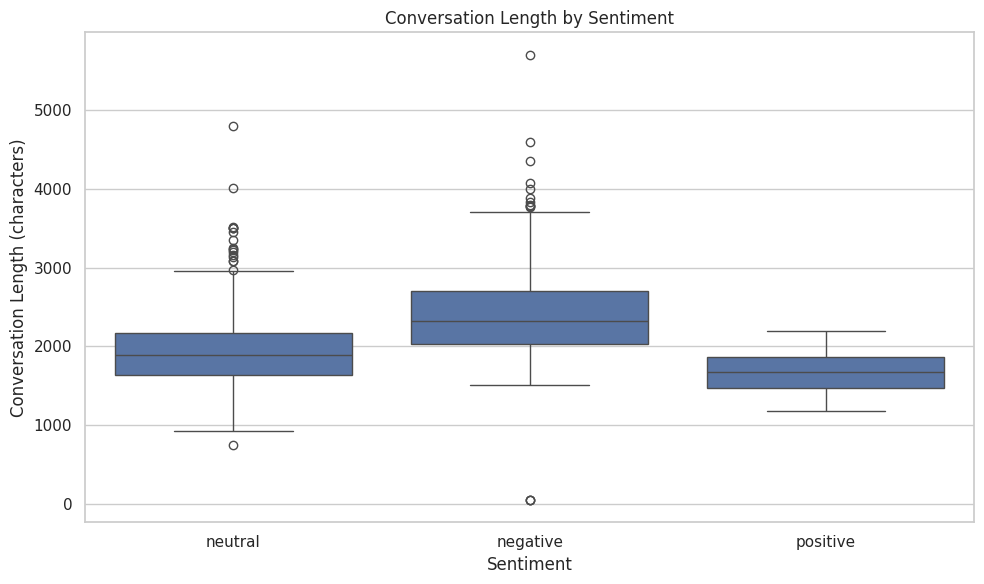

In [ ]:
train_df['conversation_length'] = train_df['conversation'].apply(len)

print("Conversation Length Statistics by Sentiment:")
length_stats = train_df.groupby('customer_sentiment')['conversation_length'].agg(['min', 'max', 'mean', 'median'])
print(length_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_sentiment', y='conversation_length', data=train_df)
plt.title('Conversation Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conversation Length (characters)')
plt.tight_layout()
plt.savefig('figures/conversation_length_by_sentiment.png', dpi=300)
plt.show()


Statistics of conversation structure:
Percentage of conversations with Customer/Agent pattern: 99.69%
Average number of customer mentions per conversation: 8.10
Average number of agent mentions per conversation: 9.08
Average total turns in conversation: 17.18


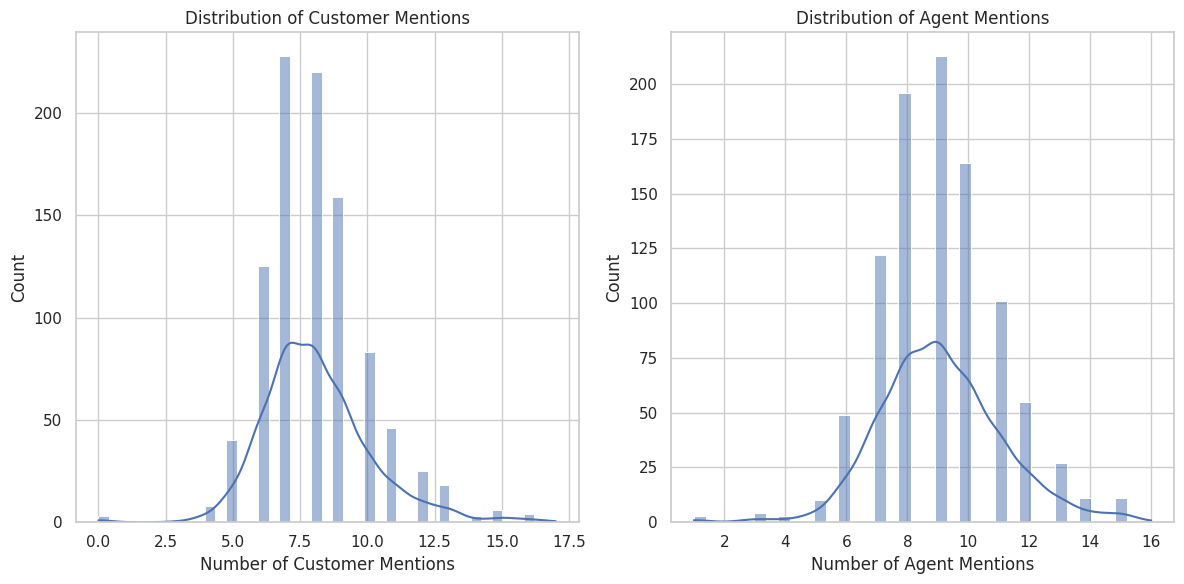

In [ ]:
train_df['customer_mentions'] = train_df['conversation'].apply(lambda x: x.count('Customer:'))
train_df['agent_mentions'] = train_df['conversation'].apply(lambda x: x.count('Agent:'))

print("\nStatistics of conversation structure:")
print(f"Percentage of conversations with Customer/Agent pattern: {(train_df[(train_df['customer_mentions'] > 0) & (train_df['agent_mentions'] > 0)].shape[0] / train_df.shape[0]) * 100:.2f}%")
print(f"Average number of customer mentions per conversation: {train_df['customer_mentions'].mean():.2f}")
print(f"Average number of agent mentions per conversation: {train_df['agent_mentions'].mean():.2f}")
print(f"Average total turns in conversation: {(train_df['customer_mentions'] + train_df['agent_mentions']).mean():.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['customer_mentions'], kde=True)
plt.title('Distribution of Customer Mentions')
plt.xlabel('Number of Customer Mentions')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(train_df['agent_mentions'], kde=True)
plt.title('Distribution of Agent Mentions')
plt.xlabel('Number of Agent Mentions')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('figures/conversation_turns_distribution.png', dpi=300)
plt.show()

In [ ]:
def extract_conversation_parts(text):
    parts = re.split(r'(Customer:|Agent:)', text)
    parts = [part.strip() for part in parts if part.strip()]

    customer_parts = []
    agent_parts = []

    current_speaker = None
    for i, part in enumerate(parts):
        if part == "Customer:":
            current_speaker = "Customer"
        elif part == "Agent:":
            current_speaker = "Agent"
        else:
            if current_speaker == "Customer":
                customer_parts.append(part)
            elif current_speaker == "Agent":
                agent_parts.append(part)

    return {
        'customer_text': ' '.join(customer_parts),
        'agent_text': ' '.join(agent_parts),
        'full_text': text
    }

print("Extracting customer and agent parts from conversations...")
extracted_conversations = train_df['conversation'].apply(extract_conversation_parts)

train_df['customer_text'] = extracted_conversations.apply(lambda x: x['customer_text'])
train_df['agent_text'] = extracted_conversations.apply(lambda x: x['agent_text'])

Extracting customer and agent parts from conversations...


Text length comparison (Customer vs Agent):
Average customer text length: 600.62 characters
Average agent text length: 1367.05 characters
Ratio of customer to agent text: 0.44


<ipython-input-44-be63e7fb6e7d>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Customer Text', 'Agent Text'])


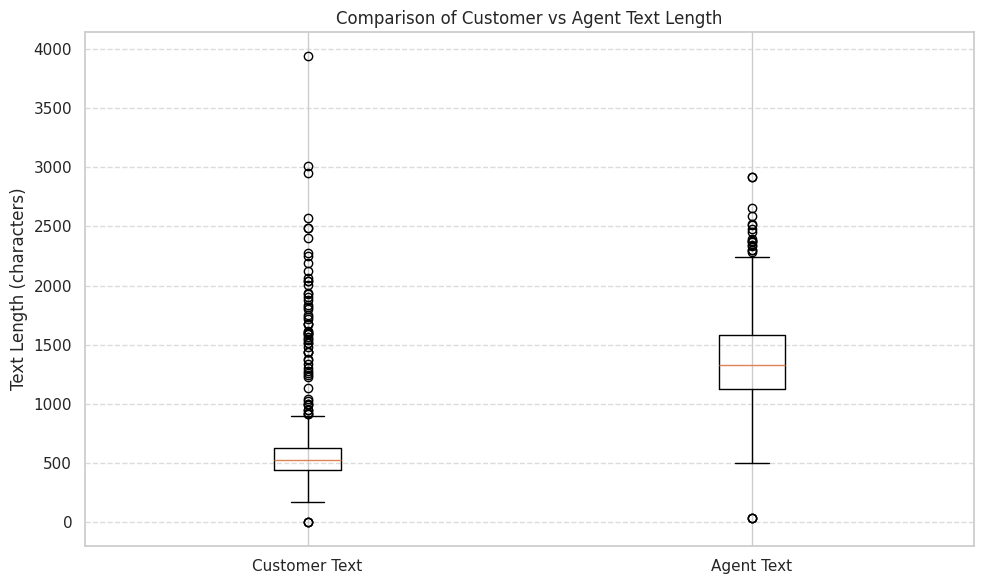

In [ ]:
train_df['customer_text_length'] = train_df['customer_text'].apply(len)
train_df['agent_text_length'] = train_df['agent_text'].apply(len)

print("Text length comparison (Customer vs Agent):")
print(f"Average customer text length: {train_df['customer_text_length'].mean():.2f} characters")
print(f"Average agent text length: {train_df['agent_text_length'].mean():.2f} characters")
print(f"Ratio of customer to agent text: {train_df['customer_text_length'].mean() / train_df['agent_text_length'].mean():.2f}")

plt.figure(figsize=(10, 6))
data = [train_df['customer_text_length'], train_df['agent_text_length']]
plt.boxplot(data, labels=['Customer Text', 'Agent Text'])
plt.title('Comparison of Customer vs Agent Text Length')
plt.ylabel('Text Length (characters)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/customer_vs_agent_text_length.png', dpi=300)
plt.show()

In [ ]:
nltk.download('punkt_tab')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)

    return processed_text


print("Applying text preprocessing...")
train_df['processed_customer_text'] = train_df['customer_text'].apply(preprocess_text)
train_df['processed_agent_text'] = train_df['agent_text'].apply(preprocess_text)
train_df['processed_full_text'] = train_df['conversation'].apply(preprocess_text)

print("\nSample of preprocessed text:")
sample_idx = 0
print("Original conversation (truncated):")
print(train_df['conversation'].iloc[sample_idx][:300] + "...")
print("\nProcessed customer text (truncated):")
print(train_df['processed_customer_text'].iloc[sample_idx][:300] + "...")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Applying text preprocessing...

Sample of preprocessed text:
Original conversation (truncated):
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with th...

Processed customer text (truncated):
hi tom trying log account purchase oven toaster grill otg unable proceed asking mobile number email verification help registered mobile number oh sorry might registered different number please check email address instead johndoe email com okay received code okay entered code verified thank help than...


Generating word clouds for different sentiment classes...


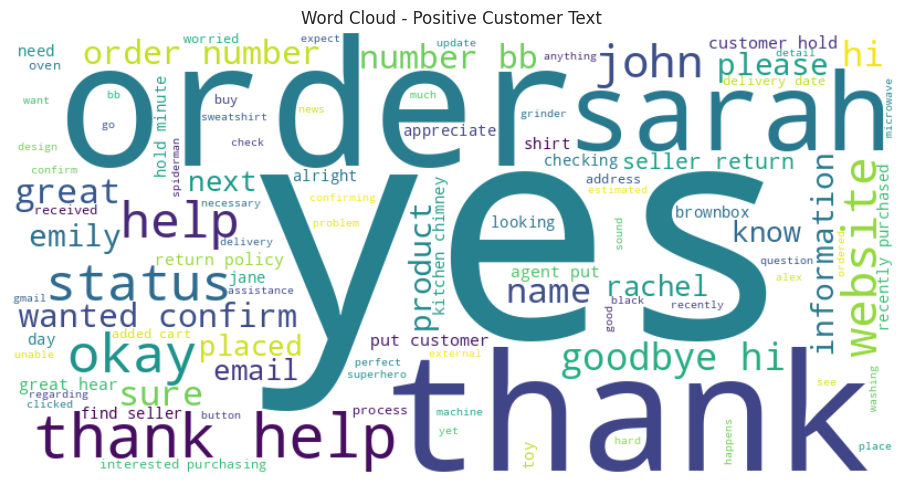

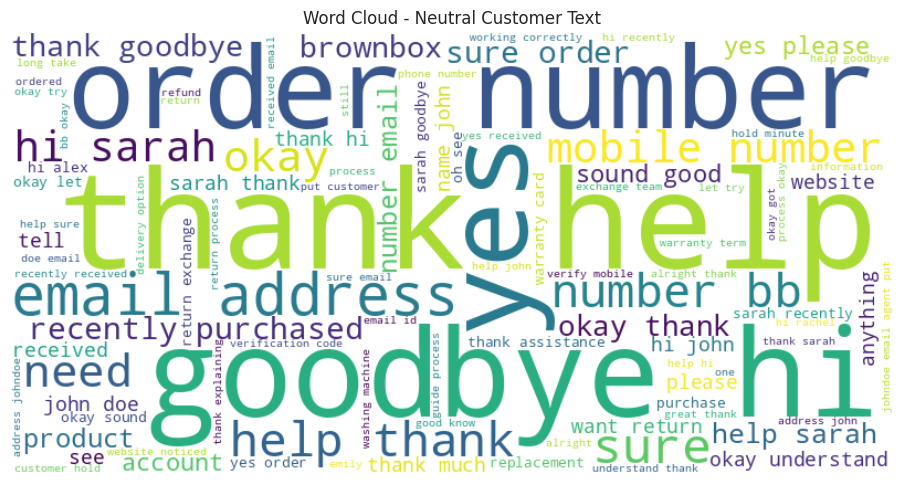

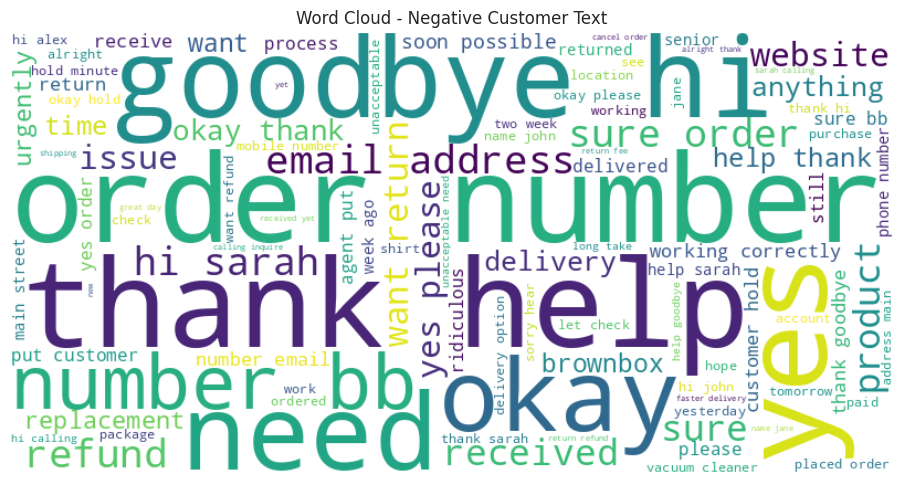

Word clouds saved as 'wordcloud_positive.png', 'wordcloud_neutral.png', and 'wordcloud_negative.png'


In [ ]:
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, contour_width=3, contour_color='steelblue').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"figures/{filename}", dpi=300)
    plt.show()

positive_customer_text = ' '.join(train_df[train_df['customer_sentiment'] == 'positive']['processed_customer_text'].tolist())
neutral_customer_text = ' '.join(train_df[train_df['customer_sentiment'] == 'neutral']['processed_customer_text'].tolist())
negative_customer_text = ' '.join(train_df[train_df['customer_sentiment'] == 'negative']['processed_customer_text'].tolist())

generate_wordcloud(positive_customer_text, 'Word Cloud - Positive Customer Text', 'wordcloud_positive.png')
generate_wordcloud(neutral_customer_text, 'Word Cloud - Neutral Customer Text', 'wordcloud_neutral.png')
generate_wordcloud(negative_customer_text, 'Word Cloud - Negative Customer Text', 'wordcloud_negative.png')

Token count statistics:
Minimum: 0
25th percentile: 38
Median: 45
75th percentile: 54
95th percentile: 106
Maximum: 336


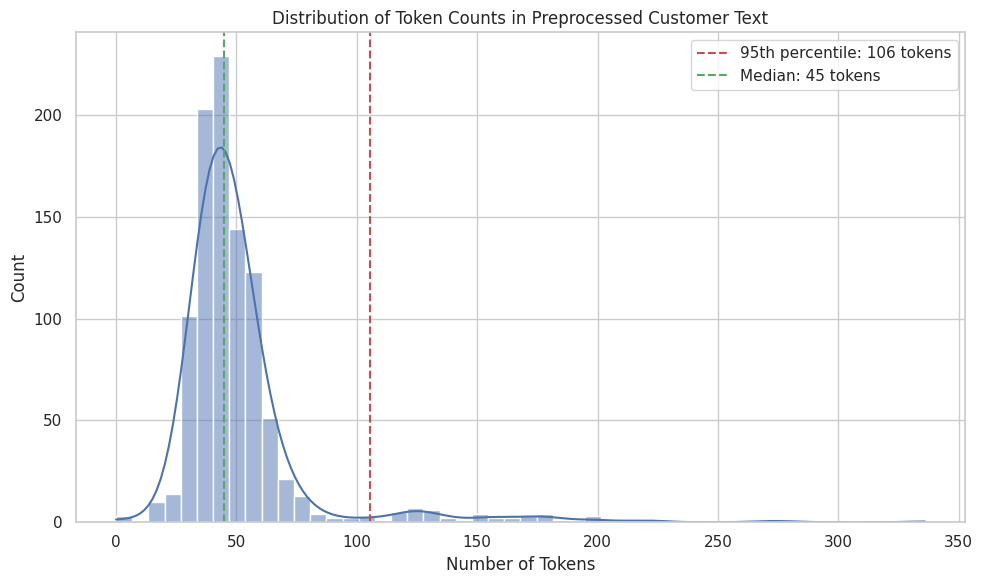

In [ ]:
final_df = train_df[['customer_sentiment', 'processed_customer_text']].copy()
final_df.rename(columns={'processed_customer_text': 'text'}, inplace=True)

sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
final_df['sentiment_label'] = final_df['customer_sentiment'].map(sentiment_map)

final_df['token_count'] = final_df['text'].apply(lambda x: len(x.split()))
print("Token count statistics:")
print(f"Minimum: {final_df['token_count'].min()}")
print(f"25th percentile: {final_df['token_count'].quantile(0.25):.0f}")
print(f"Median: {final_df['token_count'].quantile(0.5):.0f}")
print(f"75th percentile: {final_df['token_count'].quantile(0.75):.0f}")
print(f"95th percentile: {final_df['token_count'].quantile(0.95):.0f}")
print(f"Maximum: {final_df['token_count'].max()}")

plt.figure(figsize=(10, 6))
sns.histplot(final_df['token_count'], bins=50, kde=True)
plt.axvline(x=final_df['token_count'].quantile(0.95), color='r', linestyle='--',
            label=f"95th percentile: {final_df['token_count'].quantile(0.95):.0f} tokens")
plt.axvline(x=final_df['token_count'].median(), color='g', linestyle='--',
            label=f"Median: {final_df['token_count'].median():.0f} tokens")
plt.title('Distribution of Token Counts in Preprocessed Customer Text')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('figures/token_count_distribution.png', dpi=300)
plt.show()

In [ ]:
train_data, val_data = train_test_split(
    final_df,
    test_size=0.2,
    random_state=42,
    stratify=final_df['sentiment_label']
)

print(f"\nTraining set size: {train_data.shape[0]}")
print(f"Validation set size: {val_data.shape[0]}")

print("\nTraining set sentiment distribution:")
print(train_data['customer_sentiment'].value_counts(normalize=True) * 100)

print("\nValidation set sentiment distribution:")
print(val_data['customer_sentiment'].value_counts(normalize=True) * 100)


train_data.to_csv('prepared_train.csv', index=False)
val_data.to_csv('prepared_val.csv', index=False)



def analyze_vocabulary(texts):
    all_words = []
    for text in texts:
        words = text.split()
        all_words.extend(words)

    unique_words = set(all_words)
    word_freq = pd.Series(all_words).value_counts()

    return {
        'total_words': len(all_words),
        'unique_words': len(unique_words),
        'avg_words_per_text': len(all_words) / len(texts),
        'most_common_words': word_freq.head(20)
    }

vocab_stats = analyze_vocabulary(train_data['text'].tolist())

print("\nVocabulary Statistics:")
print(f"Total words: {vocab_stats['total_words']}")
print(f"Unique words: {vocab_stats['unique_words']}")
print(f"Average words per text: {vocab_stats['avg_words_per_text']:.2f}")

print("\nMost common words:")
print(vocab_stats['most_common_words'])


Training set size: 776
Validation set size: 194

Training set sentiment distribution:
customer_sentiment
neutral     55.927835
negative    42.396907
positive     1.675258
Name: proportion, dtype: float64

Validation set sentiment distribution:
customer_sentiment
neutral     55.670103
negative    42.268041
positive     2.061856
Name: proportion, dtype: float64

Vocabulary Statistics:
Total words: 39626
Unique words: 1705
Average words per text: 51.06

Most common words:
thank       1401
help         942
okay         882
order        857
yes          810
hi           807
number       755
sure         689
email        623
return       547
goodbye      522
sarah        506
need         453
address      445
please       427
received     410
want         395
john         372
website      363
bb           359
Name: count, dtype: int64


# Train

## Setup

In [ ]:
# !pip install torch numpy transformers datasets tqdm nltk scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import nullcontext
import pickle
import re
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2Config, GPT2Model, GPT2LMHeadModel
import warnings
warnings.filterwarnings('ignore')

import wandb

In [ ]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

torch.manual_seed(1337)
np.random.seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(1337)

In [ ]:
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA device: Tesla T4


## Config

In [ ]:
class Config:
    # I/O
    out_dir = 'out-sentiment'
    data_dir = 'data/customer_service'  # Directory where train.csv and test.csv are located
    eval_interval = 100  # Evaluate every this many iterations
    log_interval = 10    # Log every this many iterations
    eval_iters = 20      # Number of iterations to use for evaluation
    always_save_checkpoint = True  # If True, always save a checkpoint after each eval

    # Model
    init_from = 'scratch'  # 'scratch' or 'gpt2' for fine-tuning
    block_size = 128      # Maximum length of input sequences

    vocab_size = None     # Will be set based on tokenizer
    n_layer = 8           # Number of transformer layers
    n_head = 8            # Number of attention heads
    n_embd = 512          # Embedding dimension
    dropout = 0.1         # Dropout rate
    bias = False          # Whether to use bias in LayerNorm and Linear layers

    # AdamW optimizer
    batch_size = 32
    learning_rate = 5e-4
    max_iters = 2000      # Total number of training iterations
    weight_decay = 0.01
    beta1 = 0.9
    beta2 = 0.99
    grad_clip = 1.0       # Clip gradients at this value, or disable if 0.0

    # Learning rate decay settings
    decay_lr = True       # Whether to decay the learning rate
    warmup_iters = 100    # How many steps to warm up for
    lr_decay_iters = 2000 # Should be ~= max_iters
    min_lr = 5e-5         # Minimum learning rate

    # Inference
    temperature = 1.0     # Temperature during sampling
    top_k = 40            # Top-k sampling

    # System
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    dtype = 'bfloat16'     # 'float32', 'bfloat16', or 'float16'
    compile = False       # Use PyTorch 2.0 to compile the model

    # Sentiment Analysis specific
    num_classes = 3       # positive, neutral, negative
    max_seq_length = 256  # Maximum sequence length for sentiment analysis
    train_val_split = 0.2 # Percentage of training data to use for validation
    sentiment_map = {'positive': 2, 'neutral': 1, 'negative': 0}  # Mapping sentiment to integer labels

config = Config()

In [ ]:
# Fine-tuning options (adjust as needed)
# Uncomment to train from scratch
config.init_from = 'scratch'
config.n_layer = 8
config.n_head = 8
config.n_embd = 512
config.max_iters = 2000
config.batch_size = 32
config.block_size = 256

# Uncomment to fine-tune from GPT-2
# config.init_from = 'gpt2'
# config.n_layer = 12  # Will be overridden by GPT-2's architecture
# config.n_head = 12   # Will be overridden by GPT-2's architecture
# config.n_embd = 768  # Will be overridden by GPT-2's architecture
# config.max_iters = 1000
# config.batch_size = 16
# config.learning_rate = 3e-5

device = config.device
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[config.dtype]
ctx = nullcontext() if device == 'cpu' else torch.amp.autocast(device_type='cuda', dtype=ptdtype)

os.makedirs(config.out_dir, exist_ok=True)

## Model

In [ ]:
# This is adapted from the model.py file in the starter code

class LayerNorm(nn.Module):
    """ LayerNorm but with an optional bias """
    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5)

class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention make GPU go brrrrr but support is only in PyTorch >= 2.0
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask to ensure that attention is only applied to the left in the input sequence
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                        .view(1, 1, config.block_size, config.block_size))

    def forward(self, x, mask=None):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # manual implementation of attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            if mask is not None:
                att = att.masked_fill(mask == 0, float('-inf'))
            elif self.bias.shape[2:] != (T, T):
                # If sequence length has changed, create a new causal mask
                att_bias = torch.tril(torch.ones(T, T), diagonal=0)
                att_bias = att_bias.view(1, 1, T, T).to(att.device)
                att = att.masked_fill(att_bias == 0, float('-inf'))
            else:
                att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, bias=config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, bias=config.bias)
        self.mlp = MLP(config)

    def forward(self, x, mask=None):
        x = x + self.attn(self.ln_1(x), mask)
        x = x + self.mlp(self.ln_2(x))
        return x

In [ ]:
class GPTConfig:
    """ Configuration class to store the configuration of a GPT model """
    def __init__(self, vocab_size=None, block_size=1024, n_layer=12, n_head=12, n_embd=768,
                 dropout=0.0, bias=True, num_classes=None):
        self.vocab_size = vocab_size
        self.block_size = block_size
        self.n_layer = n_layer
        self.n_head = n_head
        self.n_embd = n_embd
        self.dropout = dropout
        self.bias = bias
        self.num_classes = num_classes

class GPTSentiment(nn.Module):
    """ GPT model adapted for sentiment analysis """
    def __init__(self, config):
        super().__init__()
        assert config.vocab_size is not None
        assert config.block_size is not None
        assert config.num_classes is not None
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            drop = nn.Dropout(config.dropout),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = LayerNorm(config.n_embd, bias=config.bias),
        ))

        # Sentiment classifier head instead of language model head
        self.sentiment_head = nn.Sequential(
            nn.Linear(config.n_embd, config.n_embd // 2),
            nn.ReLU(),
            nn.Linear(config.n_embd // 2, config.num_classes)
        )

        # Initialize weights
        self.apply(self._init_weights)

        print(f"Number of parameters: {self.get_num_params() / 1e6:.2f}M")

    def get_num_params(self, non_embedding=True):
        """
        Return the number of parameters in the model.
        For non-embedding count (default), the position embeddings get subtracted.
        """
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None, attention_mask=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size, f"Cannot forward sequence of length {t}, block size is only {self.config.block_size}"

        # Forward the GPT model itself
        # token embeddings of shape (b, t, n_embd)
        token_embeddings = self.transformer.wte(idx)

        # position embeddings of shape (t, n_embd)
        position_embeddings = self.transformer.wpe(torch.arange(0, t, dtype=torch.long, device=device))

        # Add the embeddings
        x = self.transformer.drop(token_embeddings + position_embeddings)

        # Apply transformer blocks
        for block in self.transformer.h:
            x = block(x, attention_mask)

        # Apply the final layer norm
        x = self.transformer.ln_f(x)

        # Take the representation from the last token
        # For sentiment analysis, we use the hidden state corresponding to the last token of each sequence
        # instead of using the entire sequence like in next-token prediction
        if attention_mask is not None:
            # Get the indices of the last non-padding token for each sequence
            last_token_indices = attention_mask.sum(dim=1) - 1
            last_token_indices = torch.clamp(last_token_indices, min=0)  # Ensure we don't go below 0
            batch_indices = torch.arange(b, device=device)
            x = x[batch_indices, last_token_indices]
        else:
            # If no mask, use the last token for each sequence
            x = x[:, -1]

        # Project to sentiment classes
        logits = self.sentiment_head(x)

        # Calculate loss if targets are provided
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def configure_optimizers(self, weight_decay, learning_rate, betas, device_type):
        # Start with all of the parameters
        param_dict = {pn: p for pn, p in self.named_parameters()}
        # Filter out those that do not require grad
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # Create optimizer groups: weight decay for matrices, no weight decay for biases and layernorms
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"Num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"Num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")

        # Create AdamW optimizer
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=betas)
        return optimizer

    @classmethod
    def from_pretrained(cls, model_type, config_override=None):
        """Load model from pretrained GPT2 weights"""
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        if config_override is None:
            config_override = {}

        print(f"Loading weights from pretrained gpt: {model_type}")

        # Load tokenizer
        tokenizer = GPT2Tokenizer.from_pretrained(model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]

        # Update with override args
        config_args['vocab_size'] = len(tokenizer)
        config_args['block_size'] = config_override.get('block_size', 1024)
        config_args['bias'] = True  # True for GPT2
        config_args['num_classes'] = config_override.get('num_classes', 3)

        # Create config and model
        gpt_config = GPTConfig(**config_args)
        model = cls(gpt_config)

        # Load pretrained model
        pretrained_model = GPT2LMHeadModel.from_pretrained(model_type)
        pretrained_dict = pretrained_model.state_dict()

        # Filter out and adapt the pretrained parameters
        model_dict = model.state_dict()

        # Get embeddings and transformer layers
        for key in model_dict.keys():
            if 'sentiment_head' in key:  # Skip the sentiment head
                continue

            if 'wte.weight' in key and 'wte.weight' in pretrained_dict:
                model_dict[key] = pretrained_dict['wte.weight']
            elif 'wpe.weight' in key and 'wpe.weight' in pretrained_dict:
                model_dict[key] = pretrained_dict['wpe.weight']
            elif key.startswith('transformer.h.'):
                # Extract the transformer layer and parameter name
                pretrained_key = key.replace('transformer.h.', 'h.')
                if pretrained_key in pretrained_dict:
                    model_dict[key] = pretrained_dict[pretrained_key]
            elif 'ln_f' in key:
                pretrained_key = key.replace('transformer.ln_f', 'ln_f')
                if pretrained_key in pretrained_dict:
                    model_dict[key] = pretrained_dict[pretrained_key]

        # Load the modified state dict
        model.load_state_dict(model_dict, strict=False)

        return model, tokenizer

## Data Prep.

In [ ]:
class SentimentDataset(Dataset):
    """Dataset for sentiment analysis"""
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Handle empty text
        if not text or text.isspace():
            # Create dummy token sequence for empty text
            input_ids = torch.full((self.max_length,), self.tokenizer.pad_token_id, dtype=torch.long)
            attention_mask = torch.zeros(self.max_length, dtype=torch.long)
            # Set first token to indicate it's an empty sample
            if len(input_ids) > 0:
                input_ids[0] = self.tokenizer.eos_token_id
                attention_mask[0] = 1
        else:
            # Tokenize the text
            encoding = self.tokenizer(
                text,
                truncation=True,
                max_length=self.max_length,
                padding='max_length',
                return_tensors='pt'
            )

            # Extract input_ids and attention_mask
            input_ids = encoding['input_ids'].squeeze()
            attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }


def preprocess_text(text):
    """Preprocess text for sentiment analysis"""
    if not text or text.isspace():
        return "[empty]"  # placeholder for empty text


    text = text.lower()
    # remove special characters and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    if not text or text.isspace():
        return "[empty]"

    return text

def extract_customer_text(conversation):
    """Extract customer parts from a conversation"""
    if not conversation or conversation.isspace():
        return "[no customer text]"

    parts = re.split(r'(Customer:|Agent:)', conversation)
    parts = [part.strip() for part in parts if part.strip()]

    customer_parts = []
    current_speaker = None

    for i, part in enumerate(parts):
        if part == "Customer:":
            current_speaker = "Customer"
        elif part == "Agent:":
            current_speaker = "Agent"
        else:
            if current_speaker == "Customer":
                customer_parts.append(part)

    result = ' '.join(customer_parts) # to include customer parts only
    # result = ' '.join(parts) # to include all

    if not result or result.isspace():
        return "[no customer text]"

    return result

def prepare_data(config):
    """Prepare data for sentiment analysis"""
    print("Loading data...")
    train_df = pd.read_csv(os.path.join(config.data_dir, 'train.csv'))
    test_df = pd.read_csv(os.path.join(config.data_dir, 'test.csv'))

    print(f"Training data shape: {train_df.shape}")
    print(f"Test data shape: {test_df.shape}")

    print("\nSentiment distribution in training data:")
    print(train_df['customer_sentiment'].value_counts())

    # extract customer text from conversations
    print("\nExtracting customer text from conversations...")
    train_df['customer_text'] = train_df['conversation'].apply(extract_customer_text)
    test_df['customer_text'] = test_df['conversation'].apply(extract_customer_text)

    print("\nSample conversation:")
    print(train_df['conversation'].iloc[0][:500] + '...')
    print("\nExtracted customer text:")
    print(train_df['customer_text'].iloc[0][:500] + '...')

    print("\nPreprocessing text...")
    train_df['processed_text'] = train_df['customer_text'].apply(preprocess_text)
    test_df['processed_text'] = test_df['customer_text'].apply(preprocess_text)

    print("\nPreprocessed text sample:")
    print(train_df['processed_text'].iloc[0][:500] + '...')

    # map sentiment labels to integers
    train_df['sentiment_label'] = train_df['customer_sentiment'].map(config.sentiment_map)
    test_df['sentiment_label'] = test_df['customer_sentiment'].map(config.sentiment_map)

    # split
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        train_df['processed_text'].tolist(),
        train_df['sentiment_label'].tolist(),
        test_size=config.train_val_split,
        random_state=42,
        stratify=train_df['sentiment_label']
    )

    print(f"\nSplit sizes: Train={len(train_texts)}, Val={len(val_texts)}, Test={len(test_df)}")

    test_texts = test_df['processed_text'].tolist()
    test_labels = test_df['sentiment_label'].tolist()

    return (train_texts, train_labels), (val_texts, val_labels), (test_texts, test_labels)

def get_tokenizer(config):
    """Get tokenizer based on the configuration"""
    if config.init_from == 'gpt2':
        # Use GPT2 tokenizer for fine-tuning
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        tokenizer.pad_token = tokenizer.eos_token  # Set padding token
        config.vocab_size = len(tokenizer)
    else:
        # For training from scratch, use a simple tokenizer based on the dataset vocabulary
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        tokenizer.pad_token = tokenizer.eos_token  # Set padding token
        config.vocab_size = len(tokenizer)

    return tokenizer

def create_dataloaders(train_data, val_data, test_data, tokenizer, config):
    """Create DataLoader objects for training, validation and testing"""
    # Unpack data
    train_texts, train_labels = train_data
    val_texts, val_labels = val_data
    test_texts, test_labels = test_data

    train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, config.max_seq_length)
    val_dataset = SentimentDataset(val_texts, val_labels, tokenizer, config.max_seq_length)
    test_dataset = SentimentDataset(test_texts, test_labels, tokenizer, config.max_seq_length)

    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size)
    test_loader = DataLoader(test_dataset, batch_size=config.batch_size)

    return train_loader, val_loader, test_loader

## Train

In [ ]:
def get_lr(it, config):
    """Get learning rate based on iteration"""
    # 1) linear warmup for warmup_iters steps
    if it < config.warmup_iters:
        return config.learning_rate * it / config.warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > config.lr_decay_iters:
        return config.min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - config.warmup_iters) / (config.lr_decay_iters - config.warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio))  # coeff ranges 0..1
    return config.min_lr + coeff * (config.learning_rate - config.min_lr)

@torch.no_grad()
def evaluate(model, dataloader, device):
    """Evaluate the model on the provided dataloader"""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    all_preds = []
    all_labels = []

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        logits, loss = model(input_ids, labels, attention_mask)

        # Compute accuracy
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        total_loss += loss.item() * labels.size(0)

        # Store predictions and labels for computing metrics
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    avg_loss = total_loss / total

    # Calculate additional metrics
    report = classification_report(all_labels, all_preds, zero_division=0, output_dict=True)

    model.train()
    return avg_loss, accuracy, report


import wandb

# Update the train function to include wandb logging
def train(model, train_loader, val_loader, test_loader, config):
    """Train the model with wandb logging"""
    # Initialize wandb
    wandb.init(
        project="sentiment-analysis-transformer",
        name=f"{'finetune' if config.init_from == 'gpt2' else 'scratch'}_l{config.n_layer}_h{config.n_head}_e{config.n_embd}",
        config={
            "learning_rate": config.learning_rate,
            "architecture": f"Transformer_{config.n_layer}L_{config.n_head}H_{config.n_embd}D",
            "dataset": "Customer_Sentiment",
            "epochs": config.max_iters,
            "batch_size": config.batch_size,
            "init_from": config.init_from,
            "n_layer": config.n_layer,
            "n_head": config.n_head,
            "n_embd": config.n_embd,
            "dropout": config.dropout,
        }
    )

    # Configure optimizer
    optimizer = model.configure_optimizers(
        weight_decay=config.weight_decay,
        learning_rate=config.learning_rate,
        betas=(config.beta1, config.beta2),
        device_type='cuda' if config.device != 'cpu' else 'cpu'
    )

    # Training loop
    best_val_loss = float('inf')
    iter_num = 0

    # Training metrics
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    # Move model to device
    model = model.to(config.device)

    # Initialize list to store metrics
    metrics = {
        'iter': [],
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': [],
        'lr': []
    }

    print(f"Starting training for {config.max_iters} iterations")

    model.train()
    t0 = time.time()

    # Create iterator for training data
    train_iter = iter(train_loader)

    while iter_num < config.max_iters:
        # Get batch of data
        try:
            batch = next(train_iter)
        except StopIteration:
            # Reset iterator if we've gone through the dataset
            train_iter = iter(train_loader)
            batch = next(train_iter)

        # Determine and set learning rate for this iteration
        lr = get_lr(iter_num, config) if config.decay_lr else config.learning_rate
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

        # Move batch to device
        input_ids = batch['input_ids'].to(config.device)
        attention_mask = batch['attention_mask'].to(config.device)
        labels = batch['labels'].to(config.device)

        # Forward and backward pass
        optimizer.zero_grad()
        with ctx:
            logits, loss = model(input_ids, labels, attention_mask)

        # Calculate accuracy
        preds = torch.argmax(logits, dim=1)
        acc = (preds == labels).float().mean().item()

        loss.backward()

        # Clip gradients
        if config.grad_clip != 0.0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), config.grad_clip)

        optimizer.step()

        # Log training metrics to wandb every iteration
        wandb.log({
            "train_loss": loss.item(),
            "train_acc": acc,
            "learning_rate": lr,
            "iteration": iter_num
        })

        # Log training progress
        if iter_num % config.log_interval == 0:
            print(f"Iter {iter_num}: train loss {loss.item():.4f}, train acc {acc:.4f}, lr {lr:.6f}")

        # Evaluate on validation set
        if iter_num % config.eval_interval == 0:
            val_loss, val_acc, val_report = evaluate(model, val_loader, config.device)
            print(f"Iter {iter_num}: val loss {val_loss:.4f}, val acc {val_acc:.4f}")

            # Log validation metrics to wandb
            wandb_log_dict = {
                "val_loss": val_loss,
                "val_acc": val_acc,
                "train_val_loss_diff": abs(loss.item() - val_loss),
            }

            # Add class metrics to wandb
            for label in ['0', '1', '2']:  # Negative, Neutral, Positive
                if label in val_report:
                    wandb_log_dict[f"val_f1_class_{label}"] = val_report[label]['f1-score']
                    wandb_log_dict[f"val_precision_class_{label}"] = val_report[label]['precision']
                    wandb_log_dict[f"val_recall_class_{label}"] = val_report[label]['recall']

            wandb.log(wandb_log_dict)

            # Store metrics
            metrics['iter'].append(iter_num)
            metrics['train_loss'].append(loss.item())
            metrics['val_loss'].append(val_loss)
            metrics['train_acc'].append(acc)
            metrics['val_acc'].append(val_acc)
            metrics['lr'].append(lr)

            # Save best model
            if val_loss < best_val_loss or config.always_save_checkpoint:
                best_val_loss = val_loss
                checkpoint = {
                    'model': model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'config': model.config,
                    'iter_num': iter_num,
                    'best_val_loss': best_val_loss,
                }
                print(f"Saving checkpoint to {config.out_dir}")
                os.makedirs(config.out_dir, exist_ok=True)
                torch.save(checkpoint, os.path.join(config.out_dir, 'checkpoint.pt'))

                # Log best model to wandb
                wandb.run.summary["best_val_loss"] = best_val_loss
                wandb.run.summary["best_val_acc"] = val_acc

        iter_num += 1

    # Final evaluation on test set
    print("Training complete. Evaluating on test set...")
    test_loss, test_acc, test_report = evaluate(model, test_loader, config.device)
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")
    print("\nClassification Report:")
    print(f"Precision: {test_report['weighted avg']['precision']:.4f}")
    print(f"Recall: {test_report['weighted avg']['recall']:.4f}")
    print(f"F1-score: {test_report['weighted avg']['f1-score']:.4f}")

    # Log final test results to wandb
    wandb.run.summary["test_loss"] = test_loss
    wandb.run.summary["test_acc"] = test_acc
    wandb.run.summary["test_f1"] = test_report['weighted avg']['f1-score']
    wandb.run.summary["test_precision"] = test_report['weighted avg']['precision']
    wandb.run.summary["test_recall"] = test_report['weighted avg']['recall']

    plt.figure(figsize=(6, 5))
    plt.plot(metrics['iter'], metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['iter'], metrics['val_loss'], label='Val Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    loss_path = os.path.join(config.out_dir, 'training_loss.png')
    plt.savefig(loss_path)
    plt.close()  # Close the figure to free memory
    wandb.log({"training_loss": wandb.Image(loss_path)})


    plt.figure(figsize=(6, 5))
    plt.plot(metrics['iter'], metrics['train_acc'], label='Train Accuracy')
    plt.plot(metrics['iter'], metrics['val_acc'], label='Val Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    acc_path = os.path.join(config.out_dir, 'training_accuracy.png')
    plt.savefig(acc_path)
    plt.close()
    wandb.log({"training_accuracy": wandb.Image(acc_path)})


    # Create and log confusion matrix
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(config.device)
            attention_mask = batch['attention_mask'].to(config.device)
            labels = batch['labels'].to(config.device)

            logits, _ = model(input_ids, None, attention_mask)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'], cbar=False, annot_kws={"size": 20})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # plt.title('Confusion Matrix')
    plt.tight_layout()
    cm_path = os.path.join(config.out_dir, 'confusion_matrix.png')
    plt.savefig(os.path.join(config.out_dir, 'confusion_matrix.png'), dpi=300)
    plt.savefig(cm_path)
    wandb.log({"confusion_matrix": wandb.Image(cm_path)})

    wandb.finish()

    return model, metrics, test_report

## Main

In [ ]:
def init_wandb_config():
    """Add wandb configurations to Config"""
    config.wandb_project = "sentiment-analysis-transformer-assignment1"
    config.wandb_entity = None
    config.wandb_log = True
    config.wandb_watch = 'all'  # 'gradients', 'parameters', 'all' or None
    config.wandb_run_name = f"{'finetune' if config.init_from == 'gpt2' else 'scratch'}_l{config.n_layer}_h{config.n_head}_e{config.n_embd}_lr{config.learning_rate}_do{config.dropout}_iter{config.max_iters}"


def main():
    """Main function to run the sentiment analysis"""
    # Prepare data
    train_data, val_data, test_data = prepare_data(config)

    # Get tokenizer
    tokenizer = get_tokenizer(config)

    # Create dataloaders
    train_loader, val_loader, test_loader = create_dataloaders(
        train_data, val_data, test_data, tokenizer, config)

    # Initialize model
    if config.init_from == 'scratch':
        print("Initializing model from scratch")
        model_config = GPTConfig(
            vocab_size=config.vocab_size,
            block_size=config.block_size,
            n_layer=config.n_layer,
            n_head=config.n_head,
            n_embd=config.n_embd,
            dropout=config.dropout,
            bias=config.bias,
            num_classes=config.num_classes
        )
        model = GPTSentiment(model_config)
    else:
        print(f"Fine-tuning from pretrained {config.init_from}")
        model, tokenizer = GPTSentiment.from_pretrained(
            config.init_from,
            {
                'block_size': config.block_size,
                'num_classes': config.num_classes,
                'dropout': config.dropout
            }
        )

    init_wandb_config()


    # Train
    model, metrics, test_report = train(model, train_loader, val_loader, test_loader, config)

    # get predictions on test set
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(config.device)
            attention_mask = batch['attention_mask'].to(config.device)
            labels = batch['labels'].to(config.device)

            logits, _ = model(input_ids, None, attention_mask)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'], cbar=False, annot_kws={"size": 20})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(os.path.join(config.out_dir, 'scratch_confusion_matrix.png'), dpi=300)
    plt.show()

    # save results
    results = {
        'test_accuracy': test_report['accuracy'],
        'test_precision': test_report['weighted avg']['precision'],
        'test_recall': test_report['weighted avg']['recall'],
        'test_f1': test_report['weighted avg']['f1-score'],
        'class_report': test_report
    }

    with open(os.path.join(config.out_dir, 'results.json'), 'w') as f:
        json.dump(results, f, indent=4)

    print("Training and evaluation complete!")
    print(f"Results saved to {config.out_dir}")

    return model, tokenizer, results

## Scratch

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: utkuden (utkuden-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Num decayed parameter tensors: 36, with 51,160,320 parameters
Num non-decayed parameter tensors: 19, with 8,963 parameters
Starting training for 2000 iterations
Iter 0: train loss 1.1361, train acc 0.1250, lr 0.000000
Iter 0: val loss 1.1346, val acc 0.0928
Saving checkpoint to out-sentiment
Iter 10: train loss 0.7998, train acc 0.5312, lr 0.000100
Iter 20: train loss 0.5676, train acc 0.7812, lr 0.000200
Iter 30: train loss 0.4342, train acc 0.9062, lr 0.000300
Iter 40: train loss 0.3994, train acc 0.8125, lr 0.000400
Iter 50: train loss 0.3369, train acc 0.9062, lr 0.000500
Iter 60: train loss 0.2003, train acc 0.9688, lr 0.000600
Iter 70: train loss 0.5255, train acc 0.8125, lr 0.000700
Iter 80: train loss 0.4449, train acc 0.8750, lr 0.000800
Iter 90: train loss 0.2952, train acc 0.9375, lr 0.000900
Iter 100: train loss 0.0720, train acc 0.9688, lr 0.001000
Iter 100: val loss 0.4537, val acc 0.8711
Saving checkpoint to out-sentiment
Iter 110: train loss 0.2037, train acc 0.8438, lr

FileNotFoundError: [Errno 2] No such file or directory: 'out-sentiment/figures/training_curves.png'

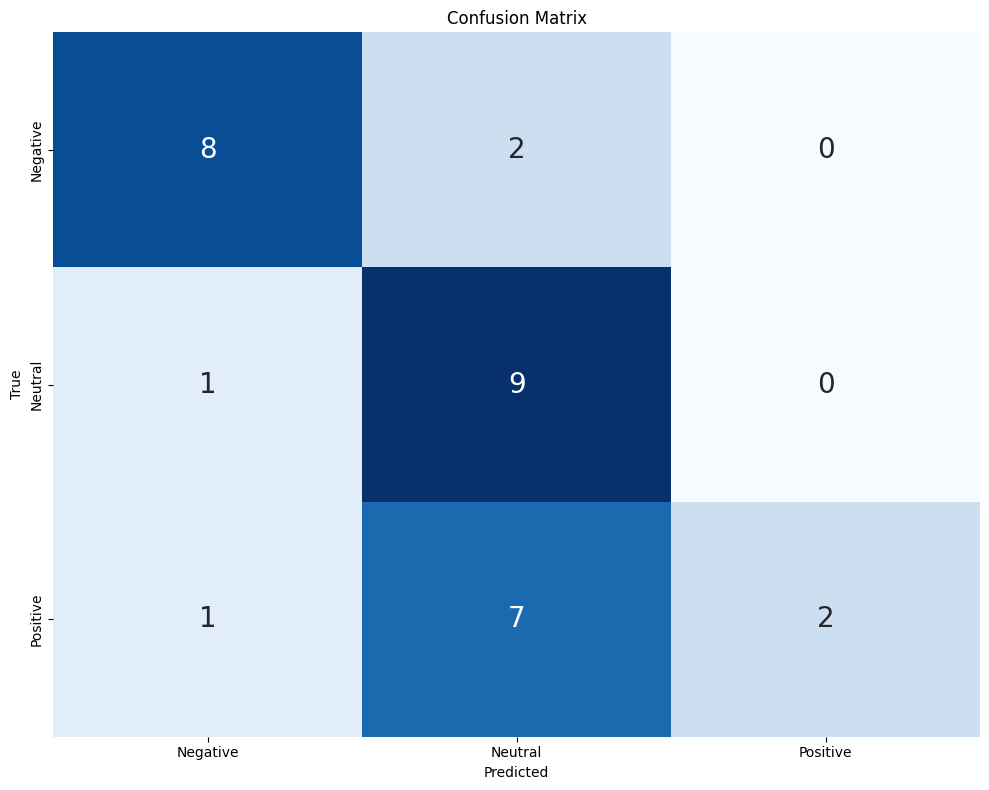

In [ ]:
# Scratch Run 1 - Big layer, head, emb. dimension, High init. LR -> Overfitted

if __name__ == "__main__":
    config.init_from = 'scratch'
    config.n_layer = 8
    config.n_head = 8
    config.n_embd = 512
    config.max_iters = 2000
    config.lr_decay_iters = 2000
    config.learning_rate = 1e-3 # 5e-4
    config.dropout = 0.2 # 0.1

    model, tokenizer, results = main()

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

iteration,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇█
learning_rate,▄▅████████▇▇▇▇▇▇▆▆▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
train_acc,▅▁▇▇▇▇▇▇█▇███▇██▇███████▇███▇████████▇██
train_loss,▄▇▃▂█▃▄▆▃▃▁▃▁▃▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▂▂▂▂▃▄▅▆▆▅▇▇▇▇▇▇▇█▇
val_acc,▁███▇▇████████▇█████
val_f1_class_0,▁█▇█▇▇▇█▇▇█▇▇▇▇▇▇█▇█
val_f1_class_1,▁███████████████████
val_f1_class_2,▁▁▁▁▁▁▁█▁▅▅▁▁▁▁▅▁▇▇▇
val_loss,▄▁▁▂▁▃▃▄▅▆▄▇▆▇▇▇▇▇█▇
val_precision_class_0,▁▇▇▆█▇▇▇██▇█▇███████


Num decayed parameter tensors: 28, with 30,088,128 parameters
Num non-decayed parameter tensors: 15, with 5,187 parameters
Starting training for 1000 iterations
Iter 0: train loss 1.1035, train acc 0.2812, lr 0.000000
Iter 0: val loss 1.1122, val acc 0.2526
Saving checkpoint to out-sentiment
Iter 10: train loss 0.8499, train acc 0.5938, lr 0.000100
Iter 20: train loss 0.6733, train acc 0.7500, lr 0.000200
Iter 30: train loss 0.8645, train acc 0.5938, lr 0.000300
Iter 40: train loss 0.6698, train acc 0.7812, lr 0.000400
Iter 50: train loss 0.4514, train acc 0.8438, lr 0.000500
Iter 60: train loss 0.4451, train acc 0.8750, lr 0.000600
Iter 70: train loss 0.1186, train acc 1.0000, lr 0.000700
Iter 80: train loss 0.1303, train acc 1.0000, lr 0.000800
Iter 90: train loss 0.0351, train acc 1.0000, lr 0.000900
Iter 100: train loss 0.2690, train acc 0.9375, lr 0.001000
Iter 100: val loss 0.5346, val acc 0.8505
Saving checkpoint to out-sentiment
Iter 110: train loss 0.5817, train acc 0.8125, lr

iteration,▁▁▁▁▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████
learning_rate,▄▇██████▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁
train_acc,▁██▅▅█▇▄█▇▇▅█▇█▇▇▇██████████████████████
train_loss,▄▂▂▄█▄▃▃▂▄▂▃▁▁▁▁▂▁▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▃▃▅▄▇▅▆█▇
val_acc,▁▇████████
val_f1_class_0,▁▇███▇████
val_f1_class_1,▁▇████████
val_f1_class_2,█▁▁▁▁▁▁▁▁▁
val_loss,█▃▁▃▂▅▄▅▆▅
val_precision_class_0,▁▂▅▃█▇▆▇█▆


TypeError: join() got an unexpected keyword argument 'dpi'

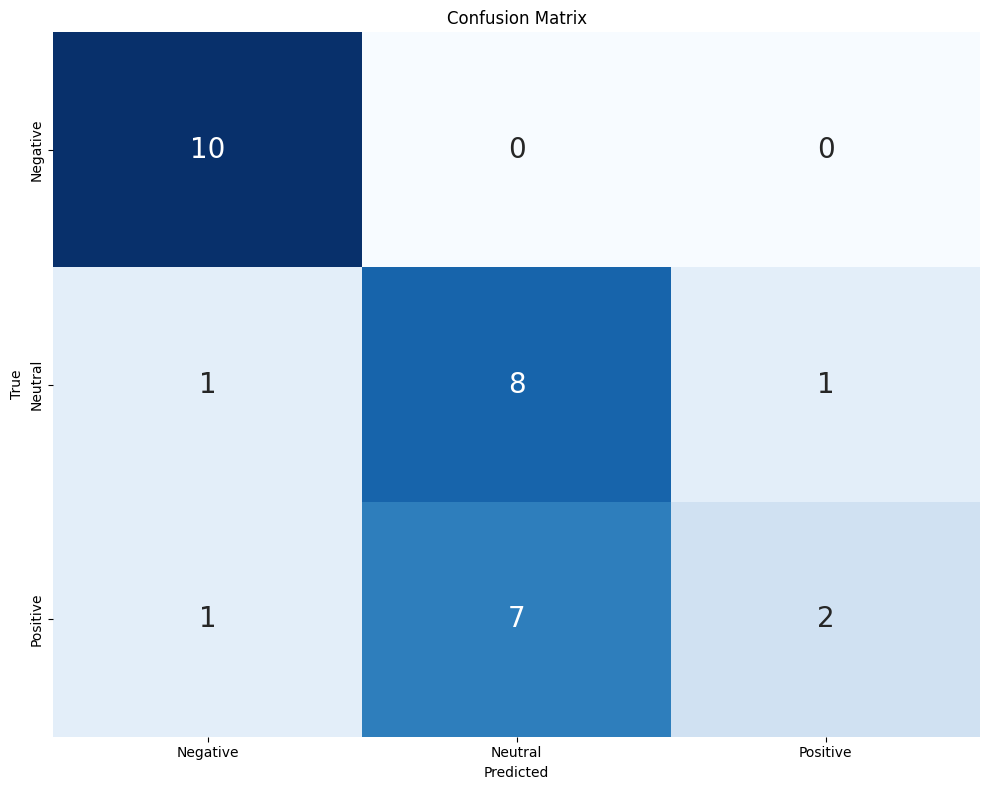

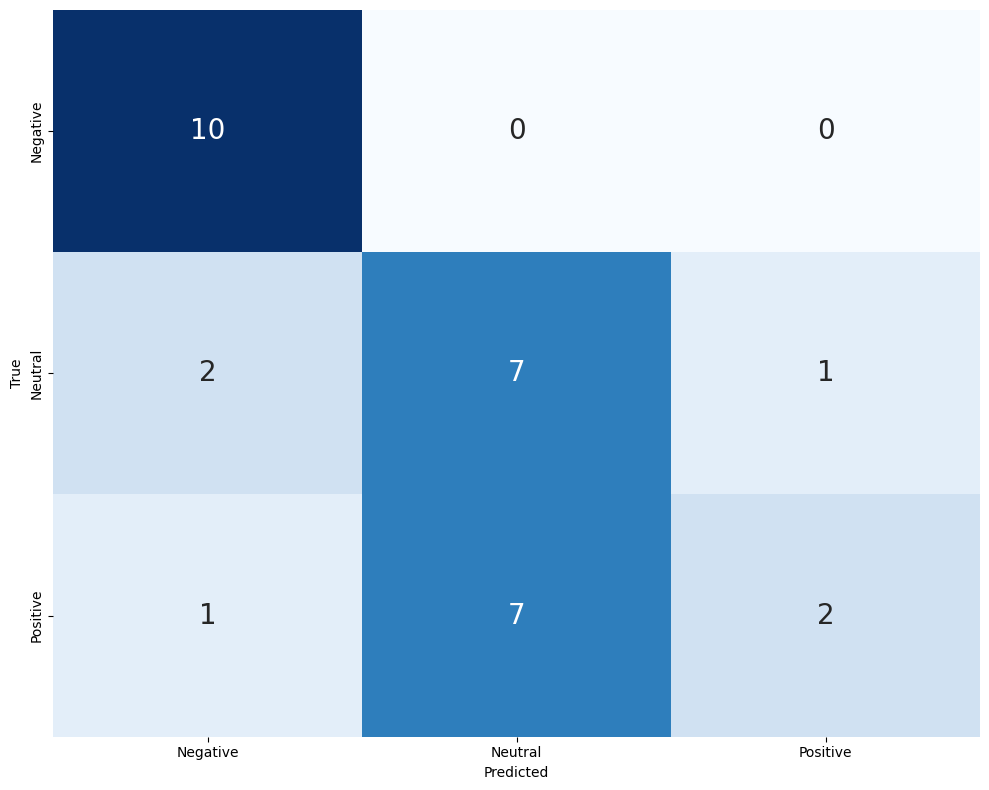

In [ ]:
# Scratch Run 2 - Smaller layer, head, emb. dimension

if __name__ == "__main__":
    # Training from scratch:
    config.init_from = 'scratch'
    config.n_layer = 6 # 8
    config.n_head = 6 # 8
    config.n_embd = 384 # 512
    config.max_iters = 1000
    config.lr_decay_iters = 1000
    config.learning_rate = 1e-3 # 5e-4
    config.dropout = 0.2 # 0.1

    model, tokenizer, results = main()

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Initializing model from scratch
Number of parameters: 30.00M


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: utkuden (utkuden-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Num decayed parameter tensors: 28, with 30,088,128 parameters
Num non-decayed parameter tensors: 15, with 5,187 parameters
Starting training for 1500 iterations
Iter 0: train loss 1.1140, train acc 0.2500, lr 0.000000
Iter 0: val loss 1.1079, val acc 0.2990
Saving checkpoint to out-sentiment
Iter 10: train loss 0.8973, train acc 0.5312, lr 0.000050
Iter 20: train loss 0.7952, train acc 0.6875, lr 0.000100
Iter 30: train loss 0.5512, train acc 0.8438, lr 0.000150
Iter 40: train loss 0.5836, train acc 0.7812, lr 0.000200
Iter 50: train loss 0.6861, train acc 0.7188, lr 0.000250
Iter 60: train loss 0.2465, train acc 0.9062, lr 0.000300
Iter 70: train loss 0.4863, train acc 0.8750, lr 0.000350
Iter 80: train loss 0.2486, train acc 0.9375, lr 0.000400
Iter 90: train loss 0.4296, train acc 0.8750, lr 0.000450
Iter 100: train loss 0.2782, train acc 0.9375, lr 0.000500
Iter 100: val loss 0.3821, val acc 0.8814
Saving checkpoint to out-sentiment
Iter 110: train loss 0.1413, train acc 0.9688, lr

iteration,▁▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇███
learning_rate,█████▇▇▇▇▇▇▇▇▆▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
train_acc,▁▁▅▆▆▇▇█████████████████████████████████
train_loss,█▆▅▃▂▅▁▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▂▄▆▆▃▇▅▄▅▆▆█▇▇
val_acc,▁██▇██▇█████▇██
val_f1_class_0,▁██▇████████▇██
val_f1_class_1,▁▇▇▇▇█▇█████▆██
val_f1_class_2,▂▁▁▁▁▁▁▁█▇▁▁▇██
val_loss,▆▁▂▅▄▂▅▃▂▃▄▅█▅▅
val_precision_class_0,▁▇██▇█▇▇██▇▇▆█▇


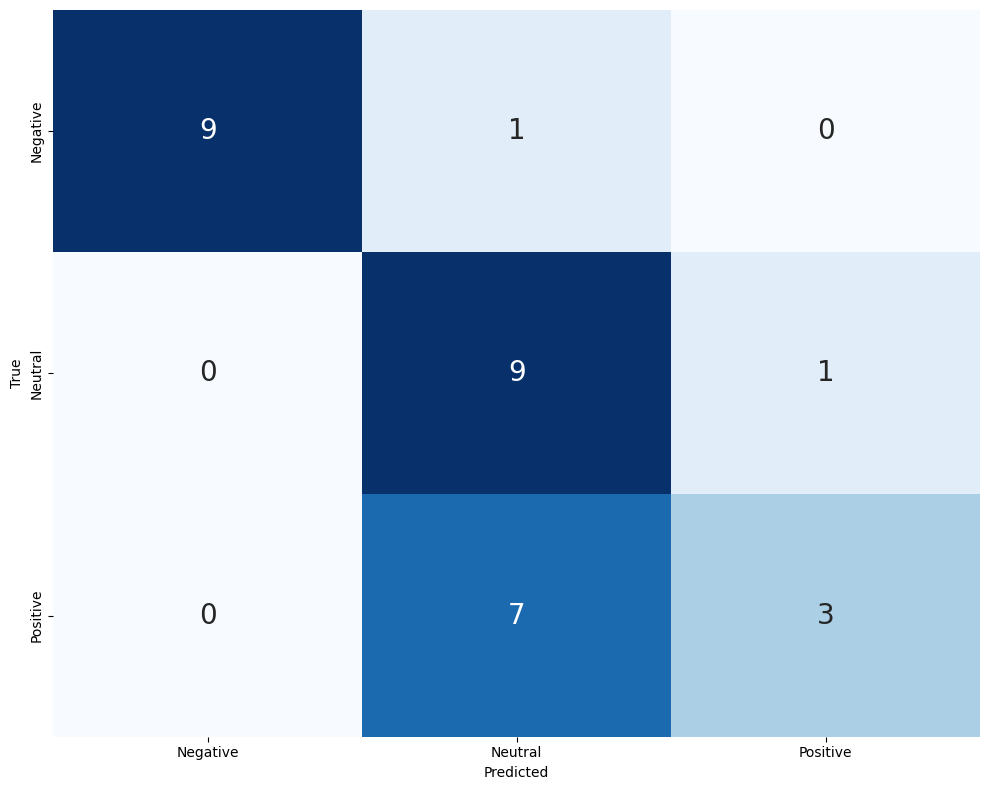

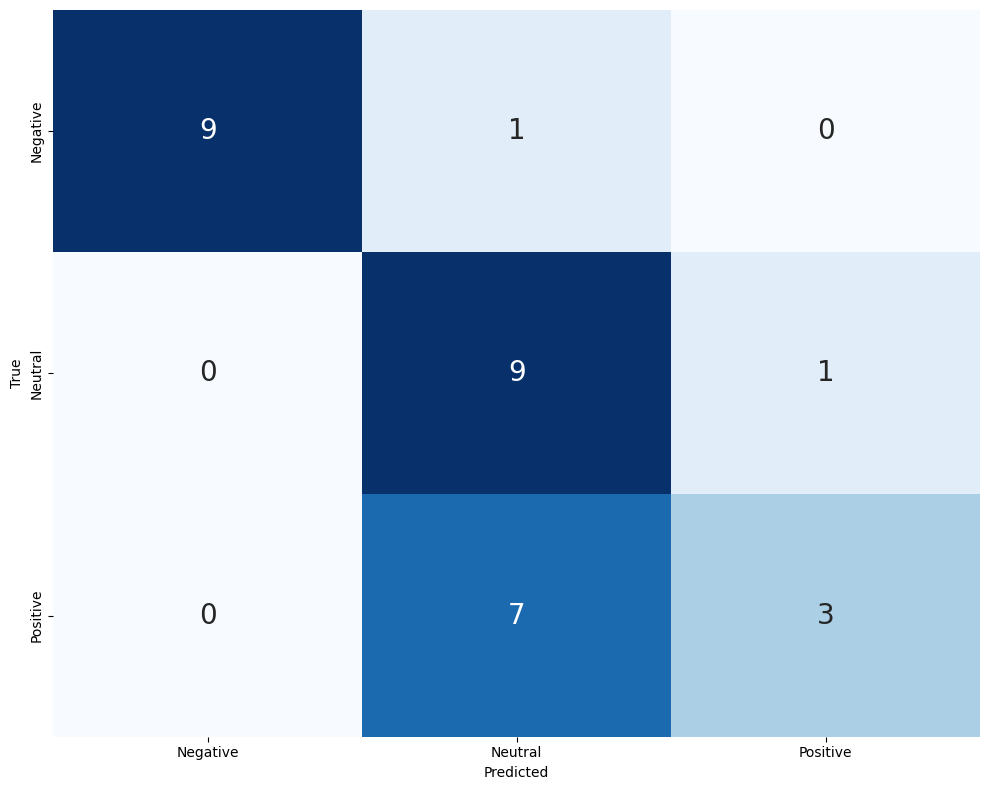

Training and evaluation complete!
Results saved to out-sentiment


In [ ]:
# Scratch Run 3 - Smaller layer, head, emb. dimension + smaller learning_rate + smaller dropout
# add lr info in wandb name

if __name__ == "__main__":

    config.init_from = 'scratch'
    config.n_layer = 6 # 8
    config.n_head = 6 # 8
    config.n_embd = 384 # 512
    config.max_iters = 1500
    config.lr_decay_iters = 1500
    config.learning_rate = 5e-4
    config.dropout = 0.1 # 0.1

    model, tokenizer, results = main()

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today? Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG)

iteration,▁
learning_rate,▁
train_acc,▁
train_loss,▁
train_val_loss_diff,▁
val_acc,▁
val_f1_class_0,▁
val_f1_class_1,▁
val_f1_class_2,▁
val_loss,▁
val_precision_class_0,▁


Num decayed parameter tensors: 28, with 30,088,128 parameters
Num non-decayed parameter tensors: 15, with 5,187 parameters
Starting training for 1500 iterations
Iter 0: train loss 1.1367, train acc 0.0938, lr 0.000000
Iter 0: val loss 1.1303, val acc 0.0928
Saving checkpoint to out-sentiment
Iter 10: train loss 0.8855, train acc 0.6250, lr 0.000050
Iter 20: train loss 0.7301, train acc 0.6250, lr 0.000100
Iter 30: train loss 0.6166, train acc 0.7188, lr 0.000150
Iter 40: train loss 0.6813, train acc 0.6562, lr 0.000200
Iter 50: train loss 0.4730, train acc 0.8438, lr 0.000250
Iter 60: train loss 0.4890, train acc 0.8125, lr 0.000300
Iter 70: train loss 0.2341, train acc 0.9375, lr 0.000350
Iter 80: train loss 0.4083, train acc 0.8750, lr 0.000400
Iter 90: train loss 0.6536, train acc 0.7188, lr 0.000450
Iter 100: train loss 0.3254, train acc 0.9062, lr 0.000500
Iter 100: val loss 0.4242, val acc 0.8711
Saving checkpoint to out-sentiment
Iter 110: train loss 0.5626, train acc 0.8750, lr

iteration,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
learning_rate,▄▄▅████████████▇▇▇▆▆▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁▁
train_acc,▁▅▅▇▇█▇█▇▇██████████████████████████████
train_loss,▆██▅▃▁▃▁▄▃▁▃▁▁▁▃▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▁▂▅▃▅▆▆▇▇▇▇███
val_acc,▁██████████████
val_f1_class_0,▁██████████████
val_f1_class_1,▁██████████████
val_f1_class_2,▂▁▁▁▁▁▁▁▁▁█▁▁▁▁
val_loss,▅▁▁▄▂▄▅▅▆▆▇▇███
val_precision_class_0,▁▆▆█▄▅█▆▆▆▆▆▆▆▆


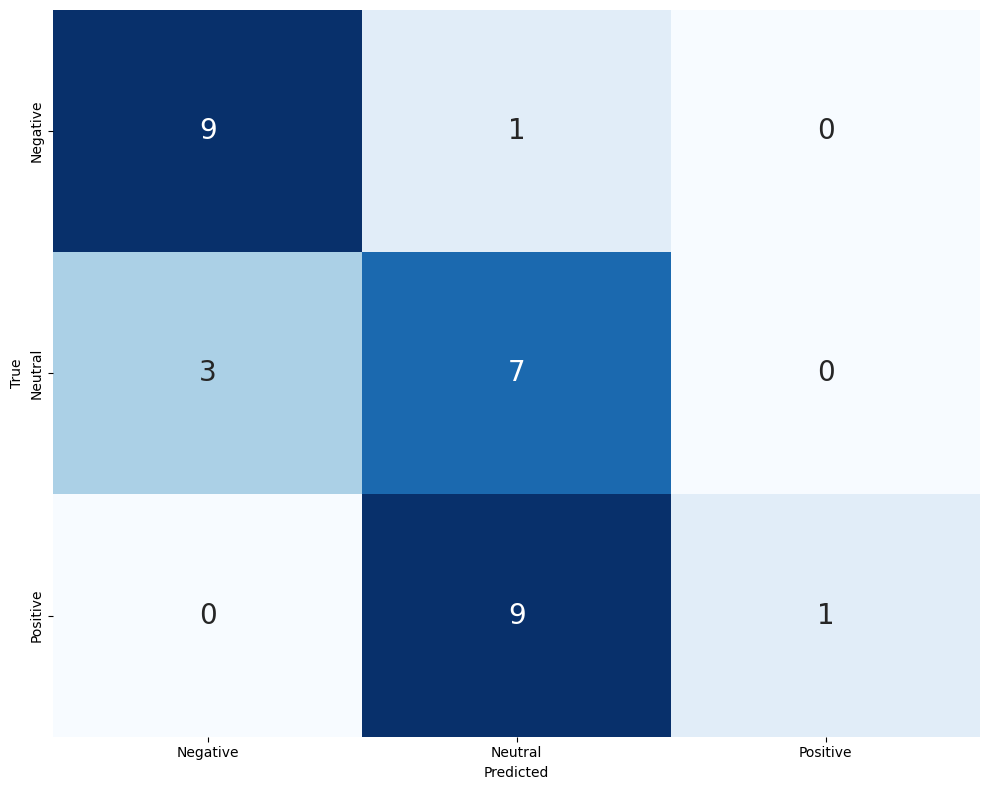

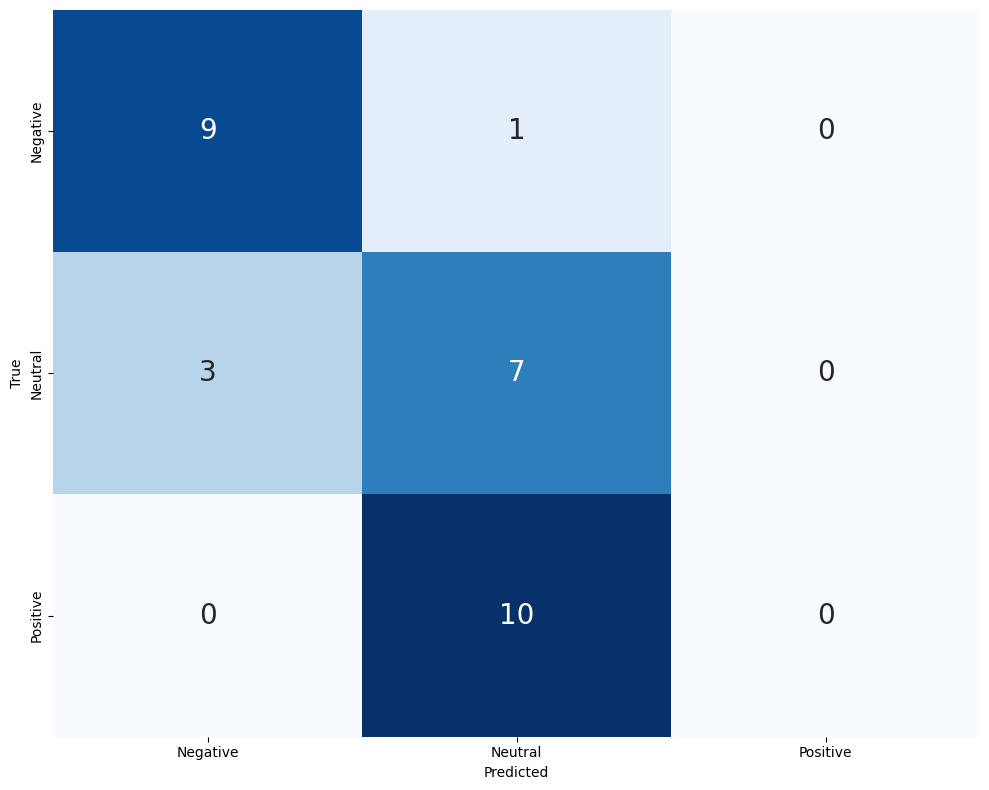

Training and evaluation complete!
Results saved to out-sentiment


In [ ]:
# Scratch Run 3 + 1 - Smaller layer, head, emb. dimension + smaller learning_rate + smaller dropout
# + ALL DATA (INCLUDING AGENT)

if __name__ == "__main__":

    config.init_from = 'scratch'
    config.n_layer = 6 # 8
    config.n_head = 6 # 8
    config.n_embd = 384 # 512
    config.max_iters = 1500
    config.lr_decay_iters = 1500
    config.learning_rate = 5e-4
    config.dropout = 0.1 # 0.1

    model, tokenizer, results = main()

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

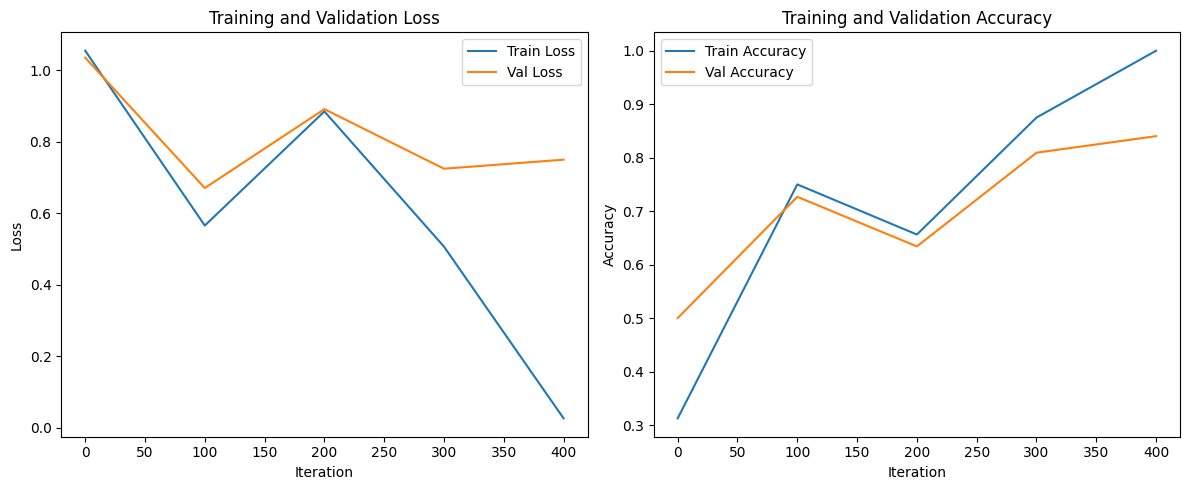

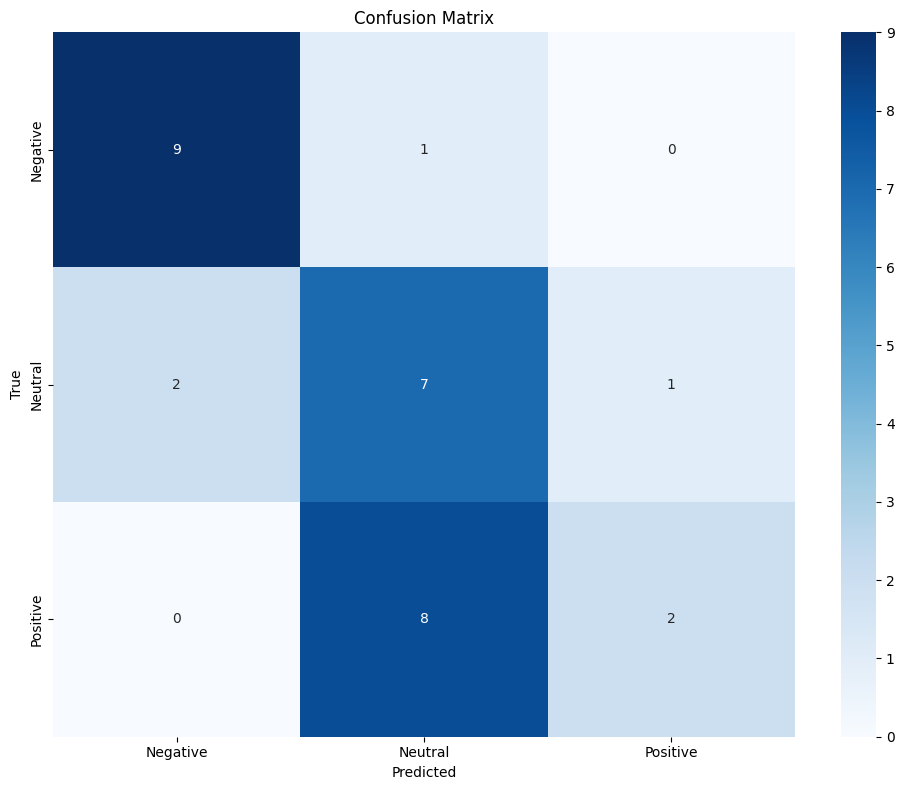

Training and evaluation complete!
Results saved to out-sentiment


In [ ]:
# First trial
if __name__ == "__main__":
    config.init_from = 'scratch'
    config.n_layer = 8
    config.n_head = 8
    config.n_embd = 512
    config.max_iters = 500

    model, tokenizer, results = main()

## Fine-tune

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Num decayed parameter tensors: 52, with 124,024,704 parameters
Num non-decayed parameter tensors: 100, with 121,731 parameters
Starting training for 500 iterations
Iter 0: train loss 1.0642, train acc 0.5625, lr 0.000000
Iter 0: val loss 1.0409, val acc 0.5464
Saving checkpoint to out-sentiment
Iter 10: train loss 0.9305, train acc 0.4375, lr 0.000003
Iter 20: train loss 0.7018, train acc 0.7500, lr 0.000006
Iter 30: train loss 0.5374, train acc 0.8125, lr 0.000009
Iter 40: train loss 0.5916, train acc 0.7188, lr 0.000012
Iter 50: train loss 0.3269, train acc 0.8750, lr 0.000015
Iter 60: train loss 0.3308, train acc 0.8438, lr 0.000018
Iter 70: train loss 0.2304, train acc 0.9062, lr 0.000021
Iter 80: train loss 0.4071, train acc 0.8438, lr 0.000024
Iter 90: train loss 0.5565, train acc 0.8125, lr 0.000027
Iter 100: train loss 0.2646, train acc 0.9062, lr 0.000030
Iter 100: val loss 0.6083, val acc 0.7835
Saving checkpoint to out-sentiment
Iter 110: train loss 0.3166, train acc 0.9062,

iteration,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇██
learning_rate,▁▂▄▄▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
train_acc,▃▂▁▁▅▆█▆▇█▇▇▇███▇███████████████████████
train_loss,█▆▅▅▄▄▅▃▄▂▃▃▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▄▄▇█
val_acc,▁▆▇██
val_f1_class_0,▁▇▇██
val_f1_class_1,▁▆▇██
val_f1_class_2,▁▁▇▇█
val_loss,█▁▃▄▅
val_precision_class_0,▁██▆▇


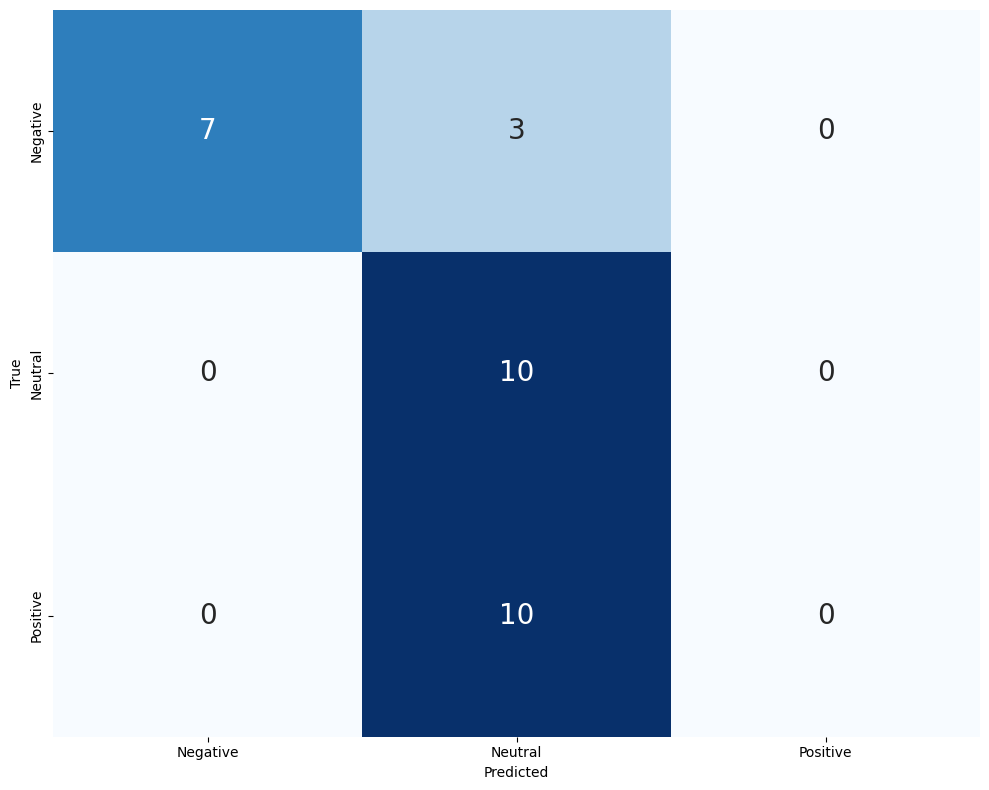

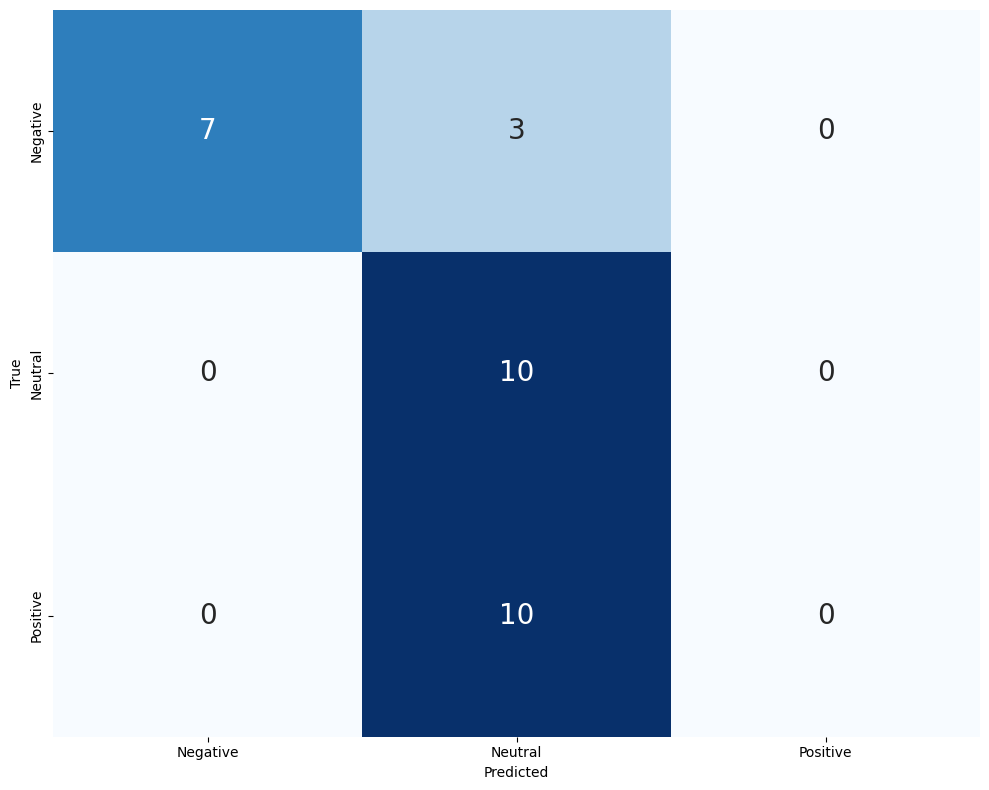

Training and evaluation complete!
Results saved to out-sentiment


In [ ]:
# Fine-tune gpt2
if __name__ == "__main__":

    # Fine-tuning:
    config.init_from = 'gpt2'
    config.max_iters = 500
    config.learning_rate = 3e-5

    model, tokenizer, results = main()

Loading data...
Training data shape: (970, 11)
Test data shape: (30, 11)

Sentiment distribution in training data:
customer_sentiment
neutral     542
negative    411
positive     17
Name: count, dtype: int64

Extracting customer text from conversations...

Sample conversation:
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch...

Extracted customer text:
Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Num decayed parameter tensors: 52, with 124,024,704 parameters
Num non-decayed parameter tensors: 100, with 121,731 parameters
Starting training for 300 iterations
Iter 0: train loss 1.1018, train acc 0.2812, lr 0.000000
Iter 0: val loss 1.1219, val acc 0.1856
Saving checkpoint to out-sentiment
Iter 10: train loss 1.0435, train acc 0.5312, lr 0.000001
Iter 20: train loss 0.8496, train acc 0.6250, lr 0.000002
Iter 30: train loss 0.7417, train acc 0.5625, lr 0.000003
Iter 40: train loss 0.5794, train acc 0.7812, lr 0.000004
Iter 50: train loss 0.5881, train acc 0.8438, lr 0.000005
Iter 60: train loss 0.6741, train acc 0.7500, lr 0.000006
Iter 70: train loss 0.4943, train acc 0.8438, lr 0.000007
Iter 80: train loss 0.3225, train acc 0.8438, lr 0.000008
Iter 90: train loss 0.2023, train acc 0.9062, lr 0.000009
Iter 100: train loss 0.1220, train acc 1.0000, lr 0.000010
Iter 100: val loss 0.4864, val acc 0.8351
Saving checkpoint to out-sentiment
Iter 110: train loss 0.2802, train acc 0.9375,

iteration,▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███
learning_rate,▁▁▂▂▂▃▄▄▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████
train_acc,▂▂▁▂▄▆▇▅▆▆▇▇▇▆▅█▆▆█▇▇▇██████████████████
train_loss,███▇▆▆▅▆▄▄▄▃▃▄▃▂▂▂▂▄▂▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
train_val_loss_diff,▁▅█
val_acc,▁██
val_f1_class_0,▁██
val_f1_class_1,▁█▇
val_f1_class_2,▂▁█
val_loss,█▁▃
val_precision_class_0,▁█▆


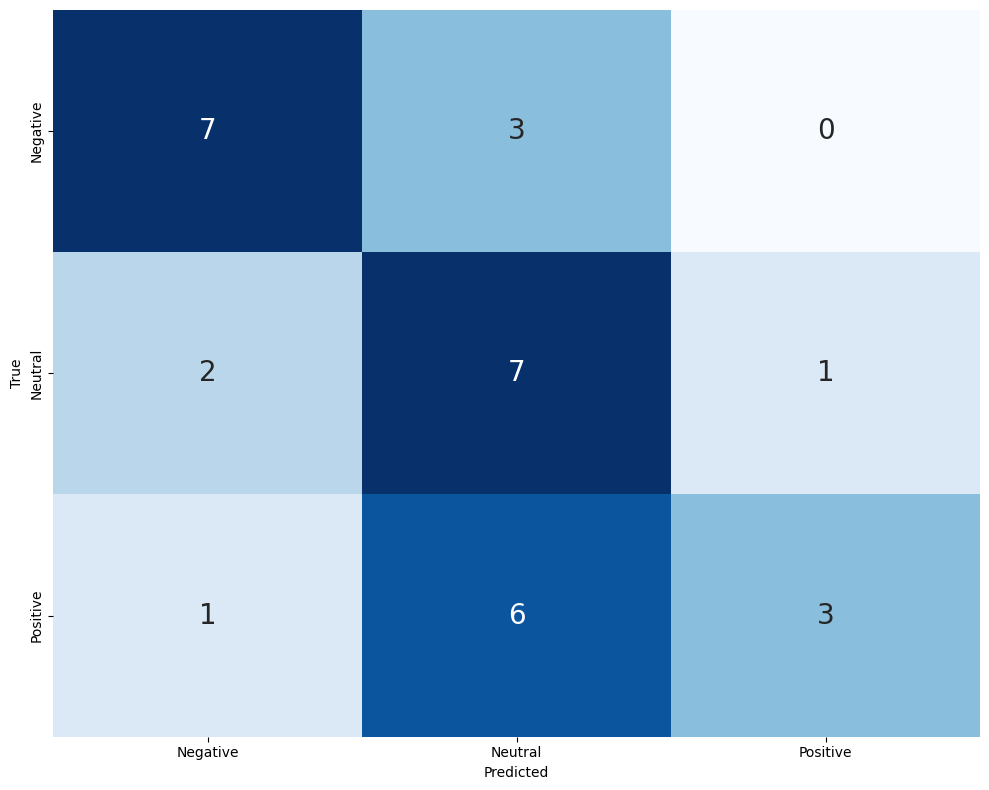

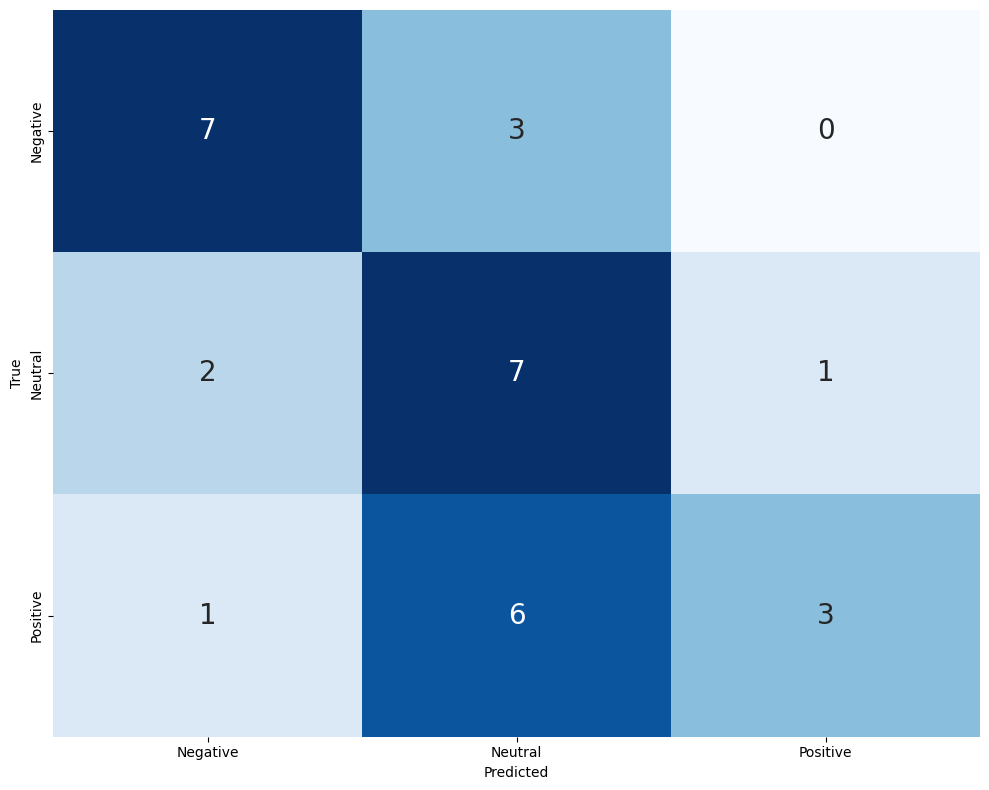

Training and evaluation complete!
Results saved to out-sentiment


In [ ]:
# Fine-tune gpt2 -> lower LR and lower iter
if __name__ == "__main__":

    # Fine-tuning:
    config.init_from = 'gpt2'
    config.max_iters = 300
    config.learning_rate = 1e-5


    model, tokenizer, results = main()